 # <ins>"Исследование критериев успешности компьютерных игр"</ins>
___

**Содержание**
___
<a id='top'></a>
1. [Исходные данные](#Исходные-данные)
2. [Постановка задачи](#Постановка-задачи)
3. [Получение данных](#Получение-данных)
4. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
5. [Проверка гипотез](#Проверка-гипотез)
6. [Выводы](#Выводы)


## Исходные данные

Интернет-магазине **«Стримчик»**, продающий по всему миру компьютерные игры планирует свою работу в **2017 г**. Из открытых источников доступны исторические данные о продажах игр до **2016 г**., оценки пользователей и экспертов, жанры и платформы. 

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Постановка задачи

Необходимо выявить определяющие успешность игры закономерности и спланировать рекламные кампании магазина на **2017г**.

## Получение данных

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за **2016 г**. могут быть неполными.

In [1750]:
# Импортируем необходимые библиотеки
import warnings

# Аналитика
import pandas as pd
import numpy as np

# Графики
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Статистика
from scipy import stats as st

In [1751]:
# Загужаем датасет
try:
    data = pd.read_csv('***')
except FileNotFoundError:
    data = pd.read_csv('***')

In [1752]:
# Задаем размер объектов графиков
width = 12
height = 4

In [1753]:
# Задаем глобальные настройки графиков
graph_set = {'figure.figsize': (width, height),
             'axes.grid.axis': 'y',
             'axes.facecolor': 'ivory',
             'axes.edgecolor': 'grey',
             'axes.linewidth': .5, 
             'grid.color': 'gray', 
             'grid.linestyle': ':',
             'grid.linewidth': 0.4,
             'font.size': 12.0,
             'axes.titlecolor': 'gray',
             'axes.titleweight': 'bold'}

bar_color = 'tab:blue'

fd_16 = {'size': 16, 'weight': 'bold', 'color': 'gray'}
fd_10 = {'size': 10, 'weight': 'bold', 'color': 'gray'}

In [1754]:
# Вносим изменения в настройки графиков
for k, v in graph_set.items():
    mpl.rcParams[k] = v

In [1755]:
# Устанавливаем формат вывода чисел
pd.options.display.float_format = '{:20,.2f}'.format

# Отключаем предупреждения
warnings.simplefilter(action='ignore')

In [1756]:
# Создадим функцию для первичной оценки датасета
def fast_eda(data, row_num=5):
    print(f'Общая информация по датасету:')
    print()
    print(data.info())
    print()
    print(f'Количество дубликатов: {data.duplicated().sum()}')
    print()
    display(data.head(row_num))

In [1757]:
fast_eda(data)

Общая информация по датасету:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Количество дубликатов: 0



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [1758]:
# Создадим функцию для рисования быстрых гистограмм
def fast_hist(data, h_size, v_size, color, width=12, height=4):
    
    # Строим быстрые гистограммы
    fast_hist = data.hist(figsize=(width, height * v_size), 
                          color=color,
                          alpha=.75,
                          edgecolor='black',
                          linewidth=.5, 
                          layout=(v_size, h_size))

    # Настраиваем отображение
    for i, ax in enumerate(fast_hist.flatten()):

        if i % 3 == 0:
            ax.set_ylabel('Количество', fontdict=fd_10)
        ax.grid(axis='x')
        ax.tick_params(axis='both', labelsize=8)

In [1759]:
# Зададим размеры координатной сетки для графиков
h_size = 3
v_size = 4

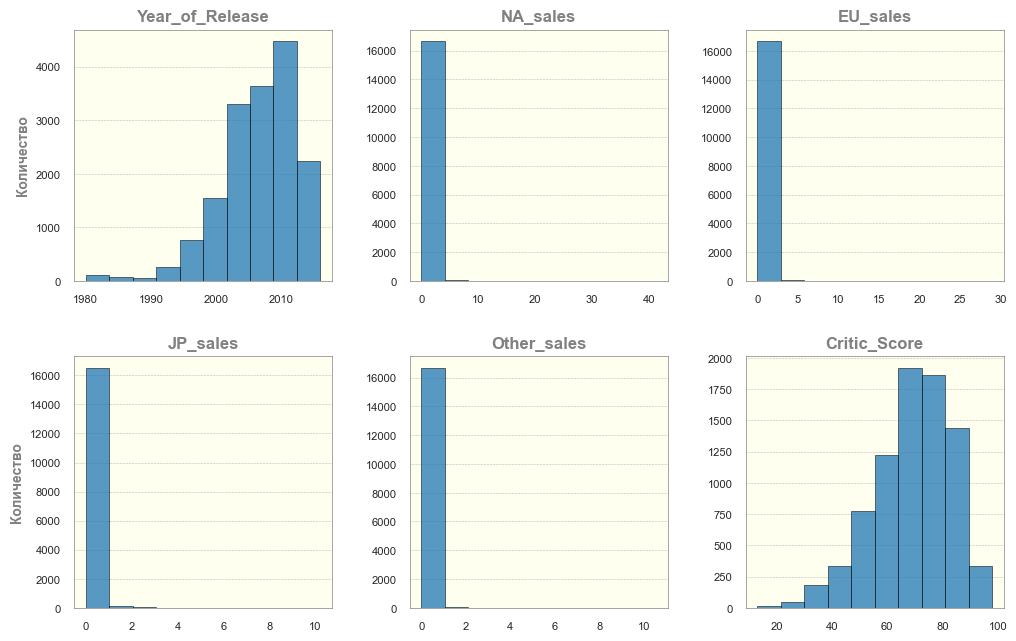

In [1760]:
fast_hist(data, h_size=h_size, v_size=v_size, color=bar_color)

**Выводы:**
1. В датасете имеются пропущенные значения, необходимо их обработать.
2. Для удобства привести названия столбцов к нижнему регистру.
3. Привести столбцы к более уместному формату данных.
4. В датасете отсутствуют явные дубликаты.

## Предварительная обработка данных

### Переименование названий колонок

Названия столбцов адекватно отражают их содержание, ограничимся переводом в нижний регистр для удобства.

In [1761]:
# Переведем названия столбцов в нижний регистр
data.columns = data.columns.str.lower()

In [1762]:
# Проверяем результат
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Дополнительно проверим на наличие неявных дубликатов по столбцам `name` и `platform`.

In [1763]:
data[data.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.5,E
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.5,T
1745,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Выявлено **5** строк, проверим этот список.

In [1764]:
data[data['name'].isin(data[data.duplicated(subset=['name', 'platform'])]['name'])].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.5,E
7066,Madden NFL 13,WiiU,"2,012.00",Sports,0.21,0.00,0.00,0.02,75.00,6.7,E
507,Madden NFL 13,X360,"2,012.00",Sports,2.53,0.15,0.00,0.17,81.00,5.8,E
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
5887,Madden NFL 13,PSV,"2,012.00",Sports,0.28,0.00,0.00,0.02,63.00,7.3,E
3986,Madden NFL 13,Wii,"2,012.00",Sports,0.47,0.00,0.00,0.03,NaN,7.3,E
6473,Need for Speed: Most Wanted,GBA,"2,005.00",Racing,0.19,0.07,0.00,0.00,NaN,8.3,E
6410,Need for Speed: Most Wanted,DS,"2,005.00",Racing,0.24,0.01,0.00,0.02,45.00,6.1,E
6273,Need for Speed: Most Wanted,WiiU,"2,013.00",Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.5,T


1. **Madden NFL 13**. Указан дважды для платформы **PS3**, явное задвоение, совпадают рейтинги критиков и пользователей, однако в столбце `eu_sales` есть данные о продажах , прибавим эти данные к основной записи, после дубль удалим.
2. **Need for Speed: Most Wanted**. В данном случае задвоения нет. Игра вышла в **2005 г**., а в **2013 г**. перевыпущена под тем же названием, оставляем как есть.
3. **Sonic the Hedgehog**. В одной из записей не указана дата релиза, явное задвоение, совпадают рейтинги критиков и пользователей, возможно это послужило причиной задвоения, есть данные в столбце `eu_sales`, возможно это ошибка при формировании датасета см. п.1. Прибавим эти данные к основной записи после дубль удалим.
4. Две записи с отсутствующим название, платформой, обработаем эти строки в следующем разделе.

In [1765]:
# Удаляем дубли для игр 'Madden NFL 13' и 'Sonic the Hedgehog'
data = data.drop(index=[4127, 16230]).reset_index(drop=True)

In [1766]:
# Для игр 'Madden NFL 13' и 'Sonic the Hedgehog' переносим данные в основную запись
data = data.drop(index=4127).reset_index(drop=True)
data.loc[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3'), 'eu_sales'] = 0.54
data.loc[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3'), 'eu_sales'] = 0.16

In [1767]:
data.shape

(16712, 11)

### Обработка столбца `name`

In [1768]:
# Проверим наличие пропусков
data['name'].isna().sum()

2

Выведем эти строки на экран.

In [1769]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14242,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В записях нет жанра, оценок и рейтинга, отсутствует название, за него можно было бы зацепиться. Чем-либо заместить эти данные невозможно, эти строки придется удалить.

Причиной появления пропусков в данных строках может быть ошибка при выгрузке или ошибка самой базы данных откуда эта выгрузка осуществлялась.

In [1770]:
# Удаляем пропуски, сбрасываем индексы
data = data.dropna(subset=['name']).reset_index(drop=True)

In [1771]:
# Проверяем результат
data['name'].isna().sum()

0

### Обработка столбца `platform`

In [1772]:
# Проверим наличие пропусков
data['platform'].isna().sum()

0

Пропусков нет, проверим на наличие неявных дубликатов.

In [1773]:
data.groupby('platform').agg(data=('name', 'count'))

,data
platform,
2600,133
3DO,3
3DS,520
DC,52
DS,2151
GB,98
GBA,822
GC,556
GEN,27


Неявных дубликатов не обнаружено.

### Обработка столбца `year_of_release`

In [1774]:
# Проверяем наличие пропусков
data['year_of_release'].isna().sum()

268

Посмотрим на эти строки.

In [1775]:
data[data['year_of_release'].isna()].sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12238,Alex Rider: Stormbreaker,DS,NaN,Action,0.06,0.00,0.00,0.00,48.00,6.1,T
8147,Twisted Metal: Small Brawl,PS,NaN,Action,0.10,0.07,0.00,0.01,51.00,7.6,T
11452,The Hidden,3DS,NaN,Adventure,0.08,0.00,0.00,0.01,NaN,4.2,E10+
6130,Unreal Championship 2: The Liandri Conflict,XB,NaN,Shooter,0.22,0.05,0.00,0.01,85.00,8.2,M
5871,Harvest Moon: The Tale of Two Towns,3DS,NaN,Simulation,0.28,0.00,0.00,0.02,NaN,NaN,NaN
16283,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
1983,Legacy of Kain: Soul Reaver,PS,NaN,Action,0.58,0.40,0.00,0.07,91.00,9,T
9513,Nintendo Puzzle Collection,GC,NaN,Puzzle,0.00,0.00,0.13,0.00,NaN,NaN,NaN
16453,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16288,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Год выпуска является категориальной переменной соотвественно заполнять средней или медианой нельзя. Попоробуем спасти часть данных взяв год выпуска из названия игры.

Причиной отсутствия данных в столбце `year_of_release` может быть ошибка базы данных, либо ошибка допущена при выгрузке.

In [1776]:
# Создаем функцию
def get_year(data):
    
    # Обычно год пишут в конце названия, разрезаем строку по пробелу берем только последний элемент образовавшегося списка
    year_string = data['name'].split()[-1]

    # Из полученного результатата вычитаем 1, т.к. обычно разработчики выпускают игру минус 1 год от указанного в названии.

    # Обрабатываем строки вида 2К10, 2К5, 2К в которых год указан в формате 2К,
    # проверяем отсутствие данных в столбце 'year_of_release'
    if '2K' in year_string and np.isnan(data['year_of_release']):
        if year_string == '2K':
            return 2000 - 1

        elif len(year_string) == 4:
            year_string = year_string.replace('K', '0')
            return float(year_string) - 1

        elif len(year_string) == 3:
            year_string = year_string.replace('K', '00')
            return float(year_string) - 1

    # Обрабатываем 4-х символьные числовые строки, переводим в число и вычитаем 1.
    # Проверяем отсутствие данных в столбце 'year_of_release'
    elif year_string.isdigit() and len(year_string) == 4 and np.isnan(data['year_of_release']):
        return float(year_string) - 1

    # Обрабатываем 2-x символьные числовые строки, дописываем век, переводим в число и вычитаем 1.
    # Проверяем отсутствие данных в столбце 'year_of_release'
    elif year_string.isdigit() and len(year_string) == 2 and np.isnan(data['year_of_release']):

        # В датасете период данных с 1980 по 2016, определяем в каком веке выпущена игра по первой цифре
        # Для игр выпущенных в начале 21 века добавляем 20
        if int(year_string[0]) == 0 or int(year_string[0]) == 1:
            year_string = '20' + year_string
            return float(year_string) - 1
        
        # Для игр выпущенных в конце 20 века добавляем 19
        elif int(year_string[0]) >= 8:
            year_string = '19' + year_string
            return float(year_string) - 1

    # Для строк, где год указан, возвращем его.
    else:
        return data['year_of_release']

In [1777]:
data['year_of_release'] = data.apply(get_year, axis=1)

In [1778]:
data['year_of_release'].isna().sum()

245

Спасено **23** строки, для мультиплатфоренных игр предлагается проверить наличие данных о годе выпуска в строках для разных платформ. Отметим, что восстановление данных о годе релиза таким способом может создать аномалии т.к. одна играм может выходить на одной платформе разных поколений. Учитывая, что таких строк небольшое количество это не окажет сильного влияния на результаты анализа, но позволит сохранить данные. Учтем это при дальнейшем анализе.

In [1779]:
data['year_of_release'] = data['year_of_release']. \
    fillna(data.groupby('name')['year_of_release'].transform('max'))

In [1780]:
# Проверяем результат
data['year_of_release'].isna().sum()

138

На этапе Исследования данных выявились аномалии и ошибки в данных, о которых писали выше, вносим исправления вручную.

In [1781]:
data.loc[(data['name'] == 'Wheel of Fortune') & (data['platform'] == 'PS2'), 'year_of_release'] = 2000

In [1782]:
data.loc[(data['name'] == 'WRC: FIA World Rally Championship') & (data['platform'] == 'PS3'), 'year_of_release'] = 2006

In [1783]:
data.loc[data['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2004

In [1784]:
data.loc[(data['name'] == 'Mario Tennis') & (data['platform'] == '3DS'), 'year_of_release'] = 2010

In [1785]:
data.loc[(data['name'] == 'Space Invaders') & (data['platform'] == '2600'), 'year_of_release'] = 1989

Осталось **138** строк с пропущенной датой релиза, менее **1%** от всего датасета, удалим эти строки.

In [1786]:
# Проверяем результат
data.shape

(16710, 11)

In [1787]:
# Удаляем строки с пропусками
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [1788]:
# Проверяем результат
data.shape

(16572, 11)

In [1789]:
# Переводим столбец в формат данных целое число
data['year_of_release'] = data['year_of_release'].astype('int16')

In [1790]:
# Проверяем результат
data['year_of_release'].isna().sum()

0

### Обработка столбца `genre`

In [1791]:
# Проверим столбец на наличие пропусков
data['genre'].isna().sum()

0

In [1792]:
# Проверим столбец на наличие неявных дубликатов
data.groupby('genre').agg(data=('genre', 'count'))

,data
genre,
Action,3342
Adventure,1294
Fighting,843
Misc,1735
Platform,878
Puzzle,572
Racing,1238
Role-Playing,1484
Shooter,1311


В столбце `genre` нет необходимости в каких-либо корректировках.

### Обработка столбцов `na_sales`, `eu_sales`, `jp_sales`

Пропусков данных в столбцах нет, посмотрим описание столбцов.

In [1793]:
data[['na_sales', 'eu_sales', 'jp_sales']].describe()

,na_sales,eu_sales,jp_sales
count,"16,572.00","16,572.00","16,572.00"
mean,0.26,0.15,0.08
std,0.82,0.51,0.31
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.08,0.02,0.00
75%,0.24,0.11,0.04
max,41.36,28.96,10.22


Явных аномалий нет, обращает на себя внимание большое количество нулевых значений и низкое значение медиан. Проверим эти строки.

In [1794]:
data[data['na_sales'] == 0].sample(8)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16569,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
15969,Turok,PC,2008,Action,0.00,0.01,0.00,0.00,65.00,6.5,M
5329,Iron Storm,SAT,1995,Shooter,0.00,0.00,0.34,0.00,NaN,NaN,NaN
16296,Fashionable Puppy: Oshare na Koinu DS,DS,2007,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
3772,Front Mission 2,PS,1997,Strategy,0.00,0.00,0.49,0.03,NaN,NaN,NaN
13756,Ookami to Koushinryou: Boku to Horo no Ichinen,DS,2008,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
6472,SD Gundam G Generation: Cross Drive,DS,2007,Strategy,0.00,0.00,0.26,0.00,NaN,NaN,NaN
15512,Jinsei Game DS,DS,2006,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [1795]:
data[data['eu_sales'] == 0].sample(8)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16275,Daiya no Kuni no Alice: Wonderful Mirror World,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
14313,Nishijin Pachinko Monogatari 2,SNES,1996,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
9619,Hisshou Pachinko*Pachi-Slot Kouryaku Series Vo...,PS2,2008,Misc,0.00,0.00,0.12,0.00,NaN,NaN,NaN
16373,Routes PE,PS2,2007,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
10013,Queen's Blade: Spiral Chaos,PSP,2009,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN
15722,Soul Eater: Monotone Princess,Wii,2008,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5456,Custom Robo,N64,2004,Role-Playing,0.00,0.00,0.29,0.04,NaN,NaN,NaN
13337,Professor Heinz Wolff's Gravity,DS,2008,Puzzle,0.04,0.00,0.00,0.00,53.00,tbd,E


In [1796]:
data[data['other_sales'] == 0].sample(8)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12765,Speed Kings,XB,2003,Racing,0.04,0.01,0.00,0.00,60.00,8.8,E
11838,DS Uranai Seikatsu,DS,2009,Misc,0.00,0.00,0.07,0.00,NaN,NaN,NaN
5964,Viz,N64,1998,Racing,0.23,0.06,0.00,0.00,NaN,NaN,NaN
14101,Cake Mania: Baker's Challenge,PSP,2008,Puzzle,0.03,0.00,0.00,0.00,NaN,tbd,E
13595,Mortimer Beckett and the Secrets of Spooky Manor,Wii,2008,Puzzle,0.04,0.00,0.00,0.00,56.00,tbd,E
12032,Midway Arcade Treasures 3,GC,2005,Misc,0.05,0.01,0.00,0.00,65.00,tbd,E
15978,Ship Simulator 2008,PC,2007,Simulation,0.00,0.01,0.00,0.00,62.00,6.6,E
14960,Tropico Reloaded,PC,2009,Strategy,0.00,0.02,0.00,0.00,NaN,tbd,T


Причин появления нулевых значений может быть несколько:


1. Нет данных, указали **0**.
2. Игра не продавалась в определенном регионе.

Заполнять пропуски средним и медианой в данном случае некорректно т.к это может оказать сильное влияние на результаты анализа. Предлагается оставить данные как есть.

### Обработка столбца `critic_scores`

In [1797]:
# Проверим наличие пропусков
data['critic_score'].isna().sum()

8496

In [1798]:
# Проверим свойства столбца
data['critic_score'].describe()

count               8,076.00
mean                   68.99
std                    13.92
min                    13.00
25%                    60.00
50%                    71.00
75%                    79.00
max                    98.00
Name: critic_score, dtype: float64

Пропусков в это столбце больше **50%**, причины отсутствия данных могут быть в том, что рейтинговые агрегаторы игр появились гораздо позже самих игр и многие игры не имеют такой оценки, либо данные потеряны при выгрузке
Оценим количество пропусков по годам, построим гистограмму.

In [1799]:
critic_score = data.pivot_table(index='year_of_release', values=['critic_score', 'name'], aggfunc=['count']).reset_index()
critic_score.columns = ['year', 'score', 'total']
critic_score['ratio'] = (critic_score['score'] / critic_score['total']) * 100

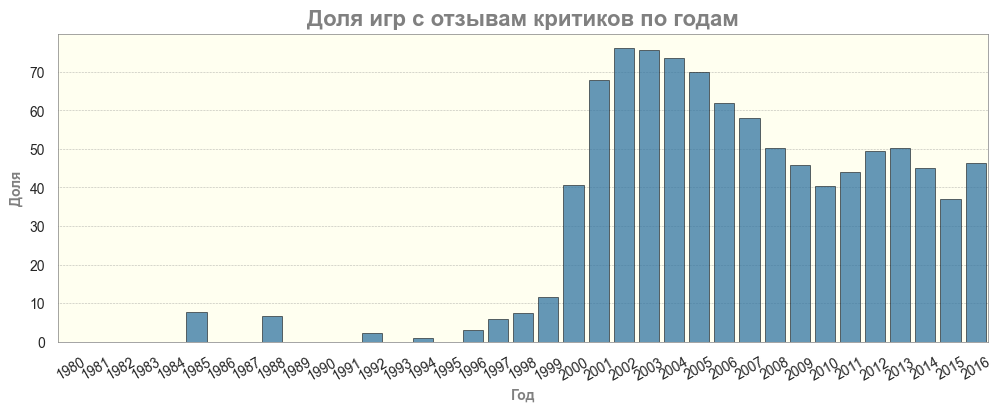

In [1800]:
# Рисуем график
ax = sns.barplot(data=critic_score, 
                 x='year', 
                 y='ratio',
                 color=bar_color,
                 alpha=.75,  
                 linewidth=.5, 
                 edgecolor='black')

ax.tick_params(axis='x', rotation=30)

# Настраиваем параметры отображения
ax.set_title('Доля игр с отзывам критиков по годам', fontdict=fd_16)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Доля', fontdict=fd_10)
ax.set_xlabel('Год', fontdict=fd_10) ;

График подтверждает предположение, доля игр с оценкой критиков начинает возрастать только с **2000 г**. и выходит на пик в **2002 - 2003 гг**.

Пойдем по пути заполнения пропусков как в столбце год релиза. Проверим наличие оценки критиков для одной и той же игры у разных платформ. Отметим, что оценки одной игры для разных платформ могут отличаться, для заполнения **Nan** в основном датафрейме возьмем среднюю оценку по игре.

In [1801]:
# Выполняем замену пропущенных значений в основном датафрейме
data['critic_score'] = data['critic_score'].\
    fillna(data.groupby(by=['name'])['critic_score'].transform('mean'))

In [1802]:
# Проверяем результат
data['critic_score'].isna().sum()

7536

Заполнили **960** строк. Заполнять оставшиеся пропуски средним, медианой или нулями некорректно т.к. это может сильно повлиять на результаты анализа, предлагается оставить как есть.

### Обработка столбца `user_score`

In [1803]:
data['user_score'].isna().sum()

6637

В столбце большое количество пропусков, кроме того столбец является строковым, возможно есть какие-то строковые значения. Проверим это предположение

In [1804]:
data[~data['user_score'].isna() & data['user_score'].str.isalpha()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,42.00,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
644,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
715,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16552,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16554,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16555,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16561,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


Столбец заполнен аббревиатурой **tbd**, что в переводе с английского означает *будет определено*, но на текущий момент данных нет, поэтому предлагается заменить на **Nan**. Дальнейшую обработку пропусков в столбце выполнить по схеме со столбцом `critic_score`.

In [1805]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [1806]:
data['user_score'].isna().sum()

9032

Пропусков стало больше примерно на **30%**, пробуем обработать.

In [1807]:
# Переведем столбец в числовой формат
data['user_score'] = data['user_score'].astype('float16')

Скорее всего распределение отзывов будет таким же как и у критиков. Причина появления пропусков - отстутсвие агрегаторов собирающих отзывы и оценки критиков в актуальный период жизни игр, либо данные потеряны при выгрузке.

In [1808]:
# Формируем сводную таблицу и переводим ее в датафрейм
user_score = data.pivot_table(index='year_of_release', \
                              values=['user_score', 'name'], aggfunc=['count']).reset_index()

# Для удобства переименовываем столбцы
user_score.columns = ['year', 'total', 'score']

# Добавляем столбец с долей отзывов от общего количества игр за год
user_score['ratio'] = (user_score['score'] / user_score['total']) * 100

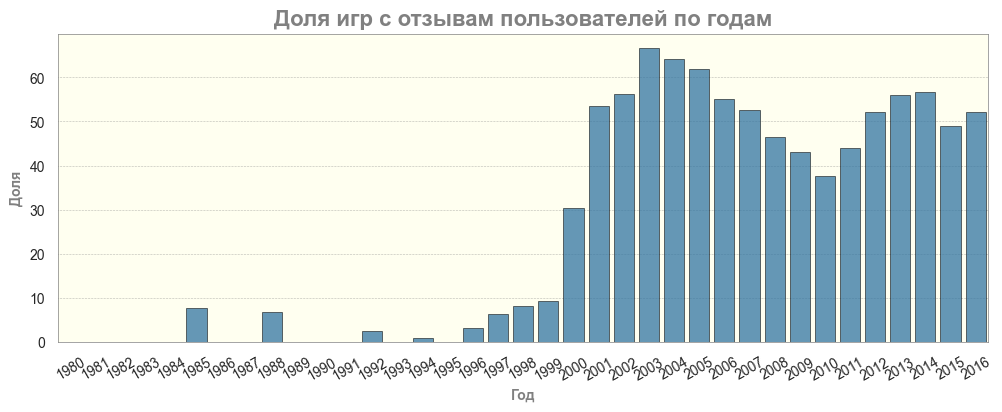

In [1809]:
# Рисуем график
ax = sns.barplot(data=user_score, 
                 x='year', 
                 y='ratio',
                 color=bar_color,
                 alpha=.75,  
                 linewidth=.5, 
                 edgecolor='black')

ax.tick_params(axis='x', rotation=30)

# Настраиваем параметры отображения
ax.set_title('Доля игр с отзывам пользователей по годам', fontdict=fd_16)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Доля', fontdict=fd_10) 
ax.set_xlabel('Год', fontdict=fd_10) ;

Обработку пропусков выполним по тому же принципу, что и в столбце `critic_score`, возьмем отсуствующие оценки с других платформ.

In [1810]:
# Выполняем замену пропущенных значений в основном датафрейме
data['user_score'] = data['user_score'].\
    fillna(data.groupby(by=['name'])['user_score'].transform('mean'))

Заполнили **767** строк. Заполнять оставшиеся пропуски средним, медианой или нулями некорректно т.к. это может сильно повлиять на результаты анализа, предлагается оставить как есть.

### Обработаем столбец `rating`

In [1811]:
# Проверим наличие пропусков
data['rating'].isna().sum()

6704

Пропусков много, причина скорее всего таже, что и в столбцах `critic_score`, `user_score`, проверим предположение.

In [1812]:
# Формируем сводную таблицу и переводим ее в датафрейм
rating = data.pivot_table(index='year_of_release', \
                          values=['rating', 'name'], aggfunc=['count']).reset_index()

# Для удобства переименовываем столбцы
rating.columns = ['year', 'total', 'score']

# Добавляем столбец с долей отзывов от общего количества игр за год
rating['ratio'] = (rating['score'] / rating['total']) * 100

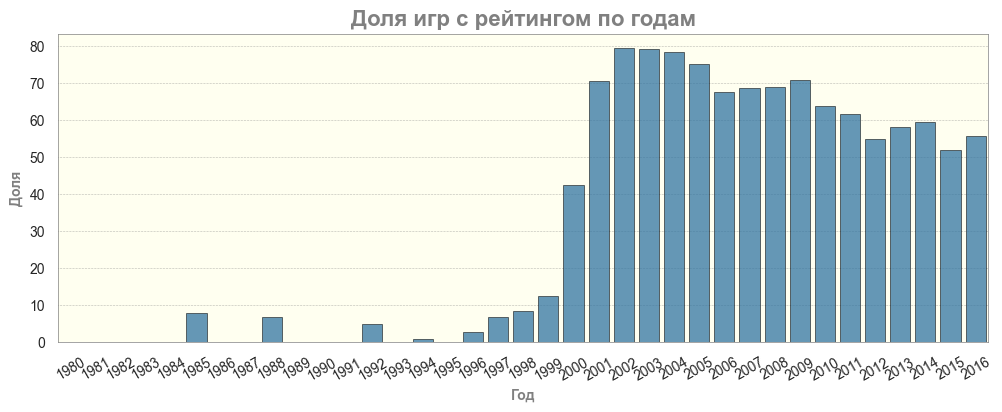

In [1813]:
# Рисуем график
ax = sns.barplot(data = rating, 
                 x = 'year', 
                 y = 'ratio',
                 color=bar_color,
                 alpha=.75,  
                 linewidth=.5, 
                 edgecolor='black')

ax.tick_params(axis='x', rotation=30)

# Настраиваем параметры отображения
ax.set_title('Доля игр с рейтингом по годам', fontdict=fd_16)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Доля', fontsize=10, fontdict=fd_10) 
ax.set_xlabel('Год', fontsize=10, fontdict=fd_10) ;

График демонстрирует, доли игр с отсутствующим рейтингом в разные годы разняться, вероятней всего причина отсутствия рейтинга это комбинация факторов. Как отсутствие рейтинга, ошибка при выгрузке, ошибка базы данных.

Попробуем избавиться от пропусков по принципу используемому в предыдущих столбцах, возьмем рейтинг из игры с другой платформы.

In [1814]:
data['rating'] = data['rating'].\
    fillna(data.groupby(by=['name'])['rating'].transform(lambda x:x.mode(dropna=False)[0]))

In [1815]:
data['rating'].isna().sum()

6425

Удалось спасти **279** строк. Заполнять оставшиеся пропуски средним, медианой или нулями некорректно т.к. это может сильно повлиять на результаты анализа, предлагается заполнить маркером **NR** (no rating).


In [1816]:
data['rating'] = data['rating'].fillna('NR')

In [1817]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16572 entries, 0 to 16571
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16572 non-null  object 
 1   platform         16572 non-null  object 
 2   year_of_release  16572 non-null  int16  
 3   genre            16572 non-null  object 
 4   na_sales         16572 non-null  float64
 5   eu_sales         16572 non-null  float64
 6   jp_sales         16572 non-null  float64
 7   other_sales      16572 non-null  float64
 8   critic_score     9036 non-null   float64
 9   user_score       8639 non-null   float32
 10  rating           16572 non-null  object 
dtypes: float32(1), float64(5), int16(1), object(4)
memory usage: 1.2+ MB


**Выводы:**
1. В результате предварительной обработки данных удалось сохранить **99%** записей от первоначального датасета.
2. Откорректированы названия столбцов для удобства дальнейшей работы.
3. В столбцах `critic_score`, `user_score`, `rating` сохранились пропуски т.к. заполнять средним значением или **0** некорректно это может оказать влияние на результаты анализа, а удалять таоке количество строк нельзя.
4. Данные переведены в более уместный формат.

## Исследовательский анализ данных

### Добавление столбца `total_sales`

In [1818]:
# Добавляем столбец 'total_sales' с суммой продаж по всем регионам
data.insert(8, 'total_sales', data.loc[:,'na_sales':'other_sales'].sum(axis=1))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16572 entries, 0 to 16571
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16572 non-null  object 
 1   platform         16572 non-null  object 
 2   year_of_release  16572 non-null  int16  
 3   genre            16572 non-null  object 
 4   na_sales         16572 non-null  float64
 5   eu_sales         16572 non-null  float64
 6   jp_sales         16572 non-null  float64
 7   other_sales      16572 non-null  float64
 8   total_sales      16572 non-null  float64
 9   critic_score     9036 non-null   float64
 10  user_score       8639 non-null   float32
 11  rating           16572 non-null  object 
dtypes: float32(1), float64(6), int16(1), object(4)
memory usage: 1.4+ MB


### Выпуск игр по годам

Проанализируем выпуск игр по годам, для анализа оставим только уникальные названия игр, игры выпущенные для нескольких платформ в расчете не учитываются.

In [1819]:
graph_data = data.drop_duplicates(subset=['name', 'year_of_release']).\
    groupby('year_of_release').agg(count=('year_of_release', 'count')).reset_index()

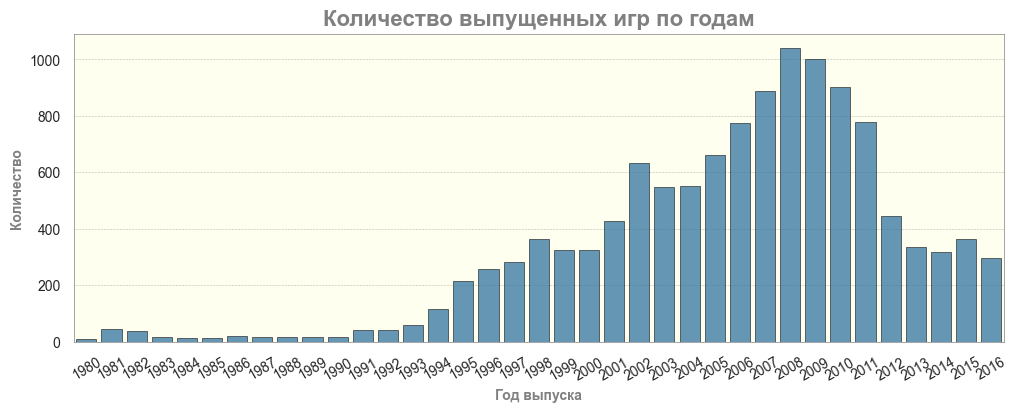

In [1820]:
# Рисуем график 
ax = sns.barplot(graph_data,
                 x='year_of_release',
                 y='count', 
                 color=bar_color,
                 alpha=.75,  
                 linewidth=.5, 
                 edgecolor='black')

# Настраиваем параметры
ax.set_title('Количество выпущенных игр по годам', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='x', rotation=30)
ax.set_ylabel('Количество', fontdict=fd_10) 
ax.set_xlabel('Год выпуска', fontdict=fd_10) ;

**Вывод:**

1. Игровая индустрия компьютерных игр начала зарождаться в начале **80-х** годов **XX** века. В начале **90-х** годов начался рост количества выпущенных игр.
2. Бурный рост производства игр пришелся на начало **2000-х**, своего пика индустрия достигла в период **2008 - 2009 гг**.
3. После **2010 г**. года наметился спад, здесь видится две причины, разработчики сделали упор на качество, а не на количество в этом немаловажную роль сыграли производители "железа" кратно нарастившие мощности видеокарт и процессоров. Из этого следует вторая причина - игры стали технически сложней, соответственно увеличились сроки их разработки.

### Платформы с наибольшим продажами на рынке

Проанализируем какие из платформ наиболее успешны с точки зрения продажи контента.

In [1821]:
# Соберем данные в сводную таблицу
platform_sales = data.groupby('platform')['total_sales'].\
    agg('sum').sort_values(ascending=False).reset_index()

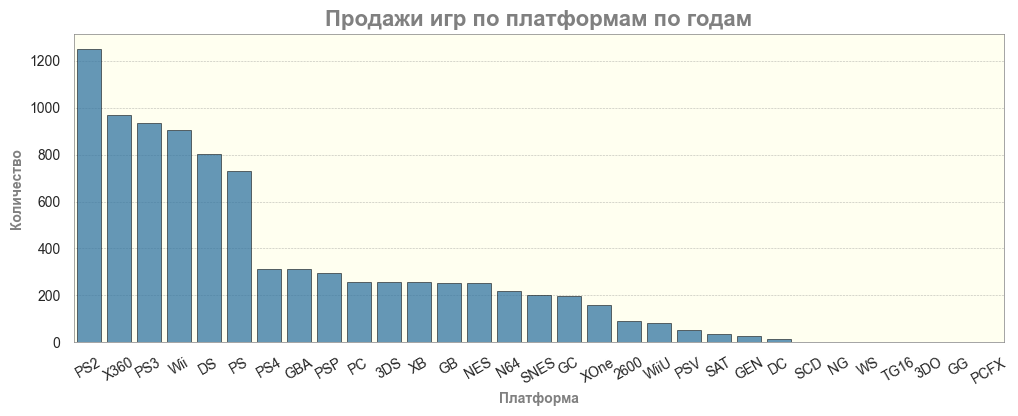

In [1822]:
# Рисуем график 
ax = sns.barplot(platform_sales,
                 x='platform',
                 y='total_sales', 
                 color=bar_color,
                 alpha=.75,  
                 linewidth=.5, 
                 edgecolor='black')

# Настраиваем параметры
ax.set_title('Продажи игр по платформам по годам', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='x', rotation=30)
ax.set_ylabel('Количество', fontdict=fd_10) 
ax.set_xlabel('Платформа', fontdict=fd_10) ;

Как видим на графике обозначились явные лидеры. Это семейство **PlayStation**, **XBOX** и **Nintendo**. Рассмотрим динамику продаж по годам **6** наиболее успешным платформам.

In [1823]:
top_platform = platform_sales.head(6)['platform'].to_list()

In [1824]:
# Задаем размеры координатной сетки
h_size = 3
v_size = 2

In [1825]:
# Создаем список с координатами плиток 
tile_coordinates = [[h, v] for h in range(h_size) for v in range(v_size)]

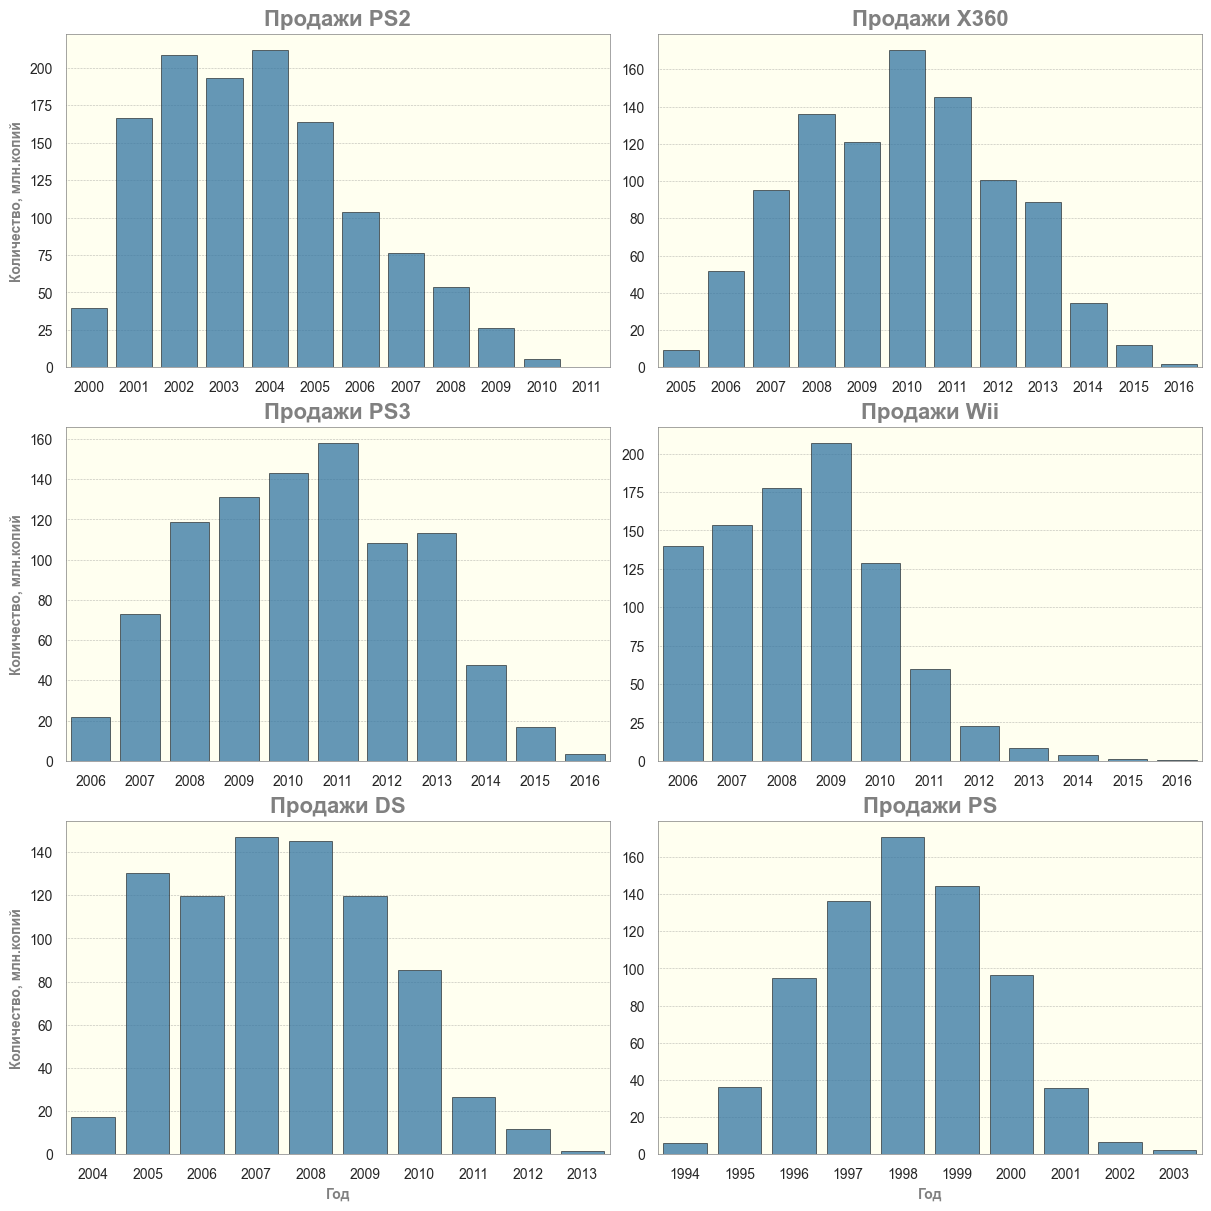

In [1826]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size)
sns.set(rc=graph_set)

fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, platform in enumerate(top_platform):
     
    #  Создаем датафрейм для отрисовки
    graph_data = data[data['platform'] == platform].\
        groupby('year_of_release')['total_sales'].agg('sum').reset_index()
    
    # Определяем координаты плиток
    pos_x = tile_coordinates[i][0]
    pos_y = tile_coordinates[i][1]

    # Рисуем график 
    ax = sns.barplot(graph_data,
                     x='year_of_release',
                     y='total_sales',
                     ax=axs[pos_x][pos_y],
                     color=bar_color,
                     alpha=.75,  
                     linewidth=.5, 
                     edgecolor='black')

    # Настраиваем параметры
    ax.set_title(f'Продажи {platform}', fontdict=fd_16)
    ax.tick_params(axis='both', labelsize=10)
    
    if i % 2 == 0:
        ax.set_ylabel('Количество, млн.копий', fontdict=fd_10)
    else:
        ax.set_ylabel('')

    if i > 3:
        ax.set_xlabel('Год', fontdict=fd_10) ;
    else:
        ax.set_xlabel('') ; 

**Выводы:**

1. Платформы вошедшие в топ продаж демострируют либо продолжающийся спад продаж, либо продажи уже прекращены. На текущий момент платформы нового поколения еще не набрали достаточного уровня продаж для попадания в топ.
2. Время жизни платформ у топ представителей **9-11** лет.
3. Наиболее устойчивый уровень продаж продемонстрировала **PlayStation 2** на протяжении **5** лет в диапазоне **150 - 220 млн. копий** в год, до сих пор считается самой успешной платформой на рынке.
4. Наиболее успешной платформой на старте является **Nintendo Wii**, в первый год выпуска обеспечила продажи игр на уровне **140 млн. копий**, возможно это связанно с тем что компания предложила уникальную на тот момент схему управления реагирующую на движение игрока.
5. Наиболее успешным производителем является **Sony**, в топ входят **3** поколения приставок **PlayStation**, **2** приставки от **Nintendo** и **1** от **Microsoft**.

### Время жизни платформ

Создадим вспомогательный датафрейм для расчета времени жизни для каждой из платформ.

In [1827]:
# Созадем датафрейм через группировку, преобразовываем в датафрейм
lifetime = data.groupby('platform').\
    agg(first_game_release=('year_of_release', 'min'),
        last_game_release=('year_of_release', 'max')).reset_index()

In [1828]:
lifetime = lifetime.assign(lifetime=lifetime['last_game_release'] - lifetime['first_game_release'])
lifetime = lifetime.sort_values(by='lifetime', ascending=False)

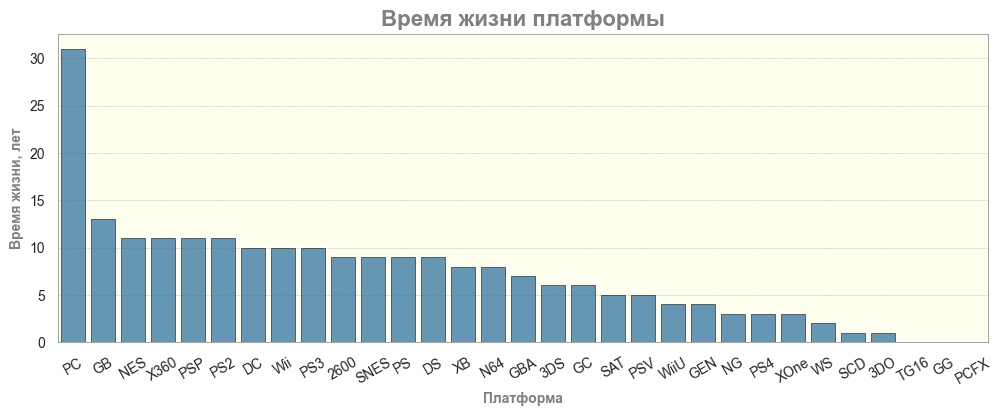

In [1829]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Рисуем график 
ax = sns.barplot(lifetime,
                    x='platform',
                    y='lifetime',
                    color=bar_color,
                    alpha=.75,  
                    linewidth=.5, 
                    edgecolor='black')

# Настраиваем параметры
ax.set_title(f'Время жизни платформы', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='x', rotation=30)
ax.set_ylabel('Время жизни, лет', fontdict=fd_10)
ax.set_xlabel('Платформа', fontdict=fd_10) ; 

In [1830]:
# Начнем индекс с 1
lifetime.index = np.arange(1, len(lifetime) + 1)

In [1831]:
lifetime.head(5)

,platform,first_game_release,last_game_release,lifetime
1,PC,1985,2016,31
2,GB,1988,2001,13
3,NES,1983,1994,11
4,X360,2005,2016,11
5,PSP,2004,2015,11


In [1832]:
lifetime['lifetime'].describe()

count                  31.00
mean                    7.10
std                     5.89
min                     0.00
25%                     3.00
50%                     7.00
75%                    10.00
max                    31.00
Name: lifetime, dtype: float64

Отбросим значения для наименее успешных платформ ниже **25** процентиля, посмотрим как изменится среднее и медиана.

In [1833]:
lifetime[lifetime['lifetime'] > 3]['lifetime'].describe()

count                  22.00
mean                    9.41
std                     5.44
min                     4.00
25%                     6.25
50%                     9.00
75%                    10.75
max                    31.00
Name: lifetime, dtype: float64

В таком виде данные выглядят более правдоподобно, среднее - **9,4** года и медиана **9** лет и эти показатели наиболее точно харрактеризуют время жизни игровых платформ.

**Выводы:**
1. Среднее время жизни платформы на рынке **9** лет.
2. Наиболее живучей является прородитель всех платформ **PC** - **31** год, основная причина, эта платформа является универсальной, имеет модульную структуру и может бесконечно улучшаться за счет замены отдельных модулей на более современные.
3. На втором месте **Game Boy** портативная игровая приставка, причина долгого нахождения на рынке видится в раннем появлении в **1989 г**., в то время "железо" развивалось достаточно медленно и данная платформа оставалсь долгое время на плаву, на смену ей пришла портативная платформа следующего поколения **Game Boy Advance**. **GBA** не удалось повторить успех своего предшественника т.к. на рынке появились, более успешные и технические совершенные конкуренты в виде **PSP**.

### Срез данных

Для дальнейшего анализа и подготовки выводов для заказчика предлагается взять срез данных за период **2014 - 2016 гг**. Это позволит увидеть динамику продаж по платформам старого и нового поколения.

In [1834]:
lifetime.sort_values(by='last_game_release', ascending=False).head(10)

,platform,first_game_release,last_game_release,lifetime
1,PC,1985,2016,31
17,3DS,2010,2016,6
25,XOne,2013,2016,3
4,X360,2005,2016,11
8,Wii,2006,2016,10
9,PS3,2006,2016,10
24,PS4,2013,2016,3
21,WiiU,2012,2016,4
20,PSV,2011,2016,5
5,PSP,2004,2015,11


In [1835]:
# Проверим количество записей вошедших во вспомогательный срез
actual_data = data[data['year_of_release'] >= 2014]
actual_data.shape[0]

1690

In [1836]:
actual_data['platform'].value_counts()

platform
PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      152
X360    111
WiiU     73
PSP      13
Wii      11
Name: count, dtype: int64

Такая выборка данных охватывает продажи как платформ последнего поколения, так и тех платформ, которые уходят с рынка, кроме того позволит оценить растут или падают продажи.

In [1837]:
graph_data = actual_data.groupby(['platform', 'year_of_release'], as_index=False).\
    agg(sum=('total_sales', 'sum')).reset_index(drop=True)

In [1838]:
# Задаем размеры координатной сетки
h_size = 2
v_size = 5

In [1839]:
# Создаем список с координатами плиток 
tile_coordinates = [[h, v] for h in range(h_size) for v in range(v_size)]

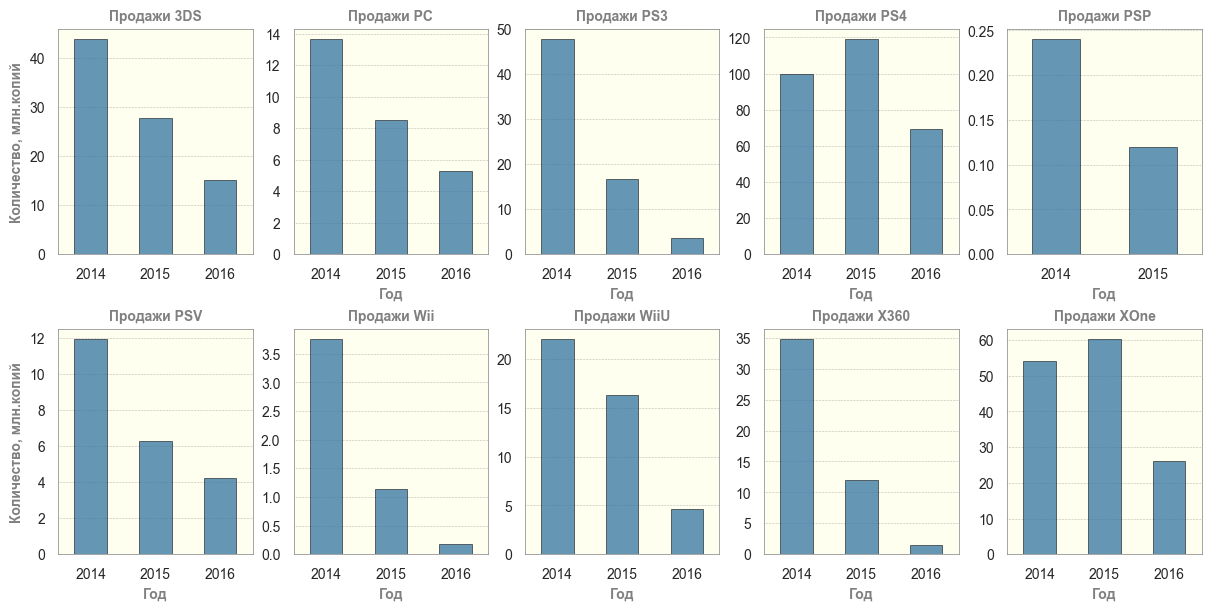

In [1840]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size * 0.75)
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

platforms = graph_data['platform'].unique()

for i, platform in enumerate(platforms):
    
    # Определяем координаты плиток
    pos_x = tile_coordinates[i][0]
    pos_y = tile_coordinates[i][1]

    # Рисуем график 
    ax = sns.barplot(graph_data[graph_data['platform'] == platform],
                     x='year_of_release',
                     y='sum',
                     ax=axs[pos_x][pos_y],
                     color=bar_color,
                     alpha=.75,  
                     linewidth=.5,
                     width=0.5,
                     edgecolor='black')

    # Настраиваем параметры
    ax.set_title(f'Продажи {platform}', fontdict=fd_10)
    ax.tick_params(axis='both', labelsize=10)
    # ax.tick_params(axis='x', rotation=30)
    if i % 5 == 0:
        ax.set_ylabel('Количество, млн.копий', fontdict=fd_10)
    else:
        ax.set_ylabel('')
    
    if i > 0:
        ax.set_xlabel('Год', fontdict=fd_10) ; 
    else:
        ax.set_xlabel('') ;

Все платформы демонстрируют снижение продаж за последние **3** года. В срез данных вошли как новые разработки так и те, что уже давно на рынке. Предлагается для дальнейшего анализа оставить только те платформы у которых текущий жизненый цикл менее **5** лет к ним добавить "неустаревающий" **PC**. Обновим выборку.

In [1841]:
actual_data = data.query("platform in ('PC', 'PS4', '3DS', 'XOne', 'WiiU', 'PSV') and year_of_release >= 2014")

In [1842]:
# Проверим количество записей вошедших в обновленную выборку
actual_data.shape[0]

1336

In [1843]:
# Соберем продажи по всем регионам в сводную таблицу
actual_data_pivot = actual_data.pivot_table(index=['platform'], 
                                            values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], 
                                            aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

In [1844]:
actual_data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   platform     6 non-null      object 
 1   eu_sales     6 non-null      float64
 2   jp_sales     6 non-null      float64
 3   na_sales     6 non-null      float64
 4   other_sales  6 non-null      float64
 5   total_sales  6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


In [1845]:
# Добавим в сводную таблицу информацию и жизненом цикле выбранных платформ
actual_data_pivot['lifetime'] = actual_data_pivot['platform'].\
    map(lifetime.set_index('platform')['lifetime'])
actual_data_pivot.index = np.arange(1, len(actual_data_pivot) + 1)
actual_data_pivot

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales,lifetime
1,PS4,130.04,15.02,98.61,44.48,288.15,3
2,XOne,46.25,0.32,81.27,12.52,140.36,3
3,3DS,16.12,44.24,22.64,3.68,86.68,6
4,WiiU,13.15,7.31,19.36,3.16,42.98,4
5,PC,18.22,0.00,7.29,1.89,27.40,31
6,PSV,3.53,14.54,2.52,1.81,22.40,5


Наболее перспективными платформами являются **PS4** и **XOne**, они находятся в самом начале своего жизненного цикла и демонстрируют более высокие продажи, чем их старшие конкуренты. У **3DS** также высокие показатели продаж, однако жизненый цикл уже находится на пике.

Рассмотрим продажи по каждой платформе.

In [1846]:
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.00,0.41,1.19,0.01,0.03,0.09,0.25,11.68
PC,152.00,0.18,0.33,0.01,0.02,0.06,0.21,3.05
PS4,376.00,0.77,1.61,0.01,0.06,0.18,0.69,14.63
PSV,295.00,0.08,0.14,0.01,0.02,0.04,0.09,1.96
WiiU,73.00,0.59,1.16,0.01,0.05,0.19,0.57,7.09
XOne,228.00,0.62,1.05,0.01,0.05,0.20,0.63,7.39


Таблица показывает, что среднее количества проданных копий по каждой игре у **PS4** самая высокая, однако медиана не самая лучшая из всех это говорит о том, что есть успешные проекты по которым у **PS4** очень высокие продажи, что подтверждается максимальным значением, самым высоким из конкурентов.

Наибольшее количество игр у **3DS**, но и на рынке платформа дольше конкурентов и тоже есть успешные проекты, однако среднее и медиана гораздо ниже за счет того, что игр больше.

У основного конкурента **PS4** **Xone** ситуация не очень благоприятная, несмотря на высокий средний показатель, у платформы на **37%** меньше игр, за тот же период жизненого цикла, и на **25%** ниже уровень средних продаж, хотя медианное значение выше всех конкурентов.

Слабые показатели демонстрирует платформа **WiiU** меньше всего игр, хотя уже **5** лет на рынке, однако средние и медианные продажи на уровне конкурентов.

Построим диаграмму распределения для визуализации табличных данных.

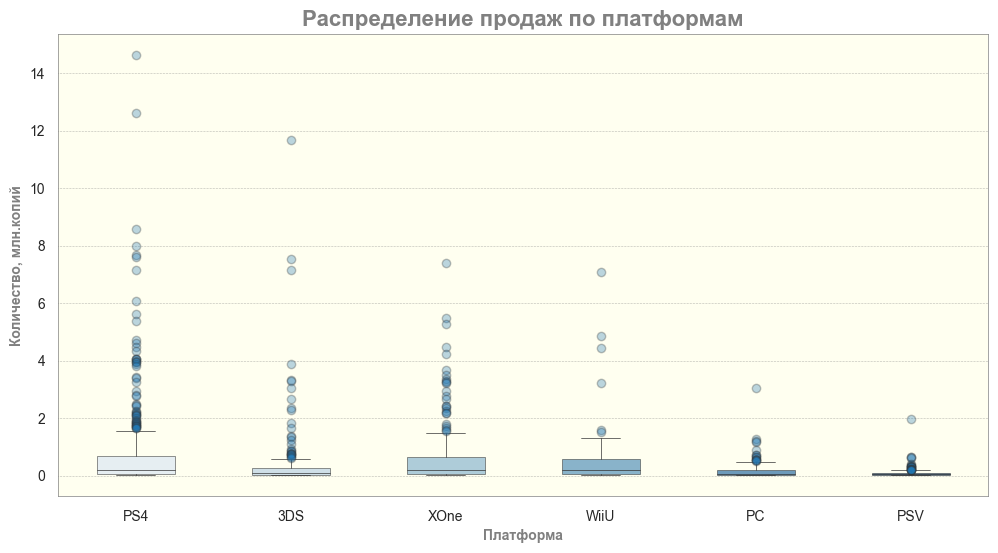

In [1847]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * 1.5)
sns.set(rc=graph_set)

# Рисуем график 
ax = sns.boxplot(actual_data,
                    y='total_sales',
                    x='platform',
                    palette='Blues',
                    boxprops={'alpha':.75},
                    flierprops={'markerfacecolor':'tab:blue',
                                'marker': 'o', 
                                'markersize': 6,
                                'alpha': 0.3}, 
                    linewidth=.5,
                    width=.5)

# Настраиваем параметры
ax.set_title('Распределение продаж по платформам', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Количество, млн.копий', fontdict=fd_10)
ax.set_xlabel('Платформа', fontdict=fd_10) ; 

Диаграмма подтверждает тезисы о том, что у платформ **3DS** и **PS4** есть ряд успешных проектов, а вот конкуренты пока не могут этим похвастаться.

Выделяется PS4 - количеством успешных проектов.

Отметим платформу **PC**, у платформы **5** показатель по продажам и более чем в десять раз ниже чем у лидера, при этом количество игр на сопоставимо с конкурентами. Возможная причина в том, что того приставки менее подвержены пиратству, а для **PC** можно вполне свободно найти пиратскую версию игры и без особых технических навыков ее установить и пользоваться.

Сделаем диаграмму более читаемой.

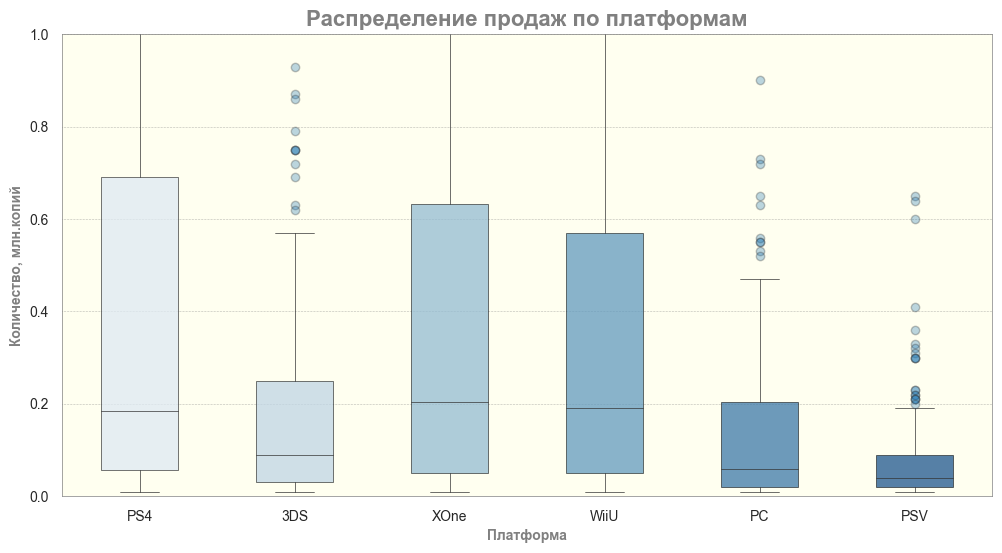

In [1848]:
# Рисуем график 
ax = sns.boxplot(actual_data,
                    y='total_sales',
                    x='platform',
                    palette='Blues',
                    boxprops={'alpha':.75, 
                              'edgecolor': 'black'}, 
                    linewidth=.5,
                    width=.5,
                    flierprops = {'markerfacecolor':'tab:blue',
                                  'marker': 'o', 
                                  'markersize': 6,
                                  'alpha': 0.3}
                                  )

# Настраиваем параметры
ax.set_title('Распределение продаж по платформам', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)

ax.set_ylabel('Количество, млн.копий', fontdict=fd_10)
ax.set(ylim=(0, 1))
ax.set_xlabel('Платформа', fontdict=fd_10) ; 

В таком виде картина более равномерная, у платформ **PS4**, **WiiU**, **XOne**, есть крепкие середняки, а вот **3DS** заметно проседает. Это говорит о том, что платформа выезжает за счет удачных проектов, а основная масса игр не очень хорошо продается. В этом ключе наиболее выгодно смотрится **PS4** у платформы есть как крепкие середняки так и суперхиты, которые вытаскивают продажи на высокий уровень.

**Выводы:**
1. Наиболее предпочтительной выглядит платформа **PS4**, широкий ассортимент игр, наличие супер-хитов и большой выбор середняков, кроме того платформа находится в начальной фазе жизненного цикла, т.е. разработчики будут продолжать создавать игры для этой платформы.
2. Платформа **3DS** так же имеет неплохие показатели и по количеству игр и по супер-хитам, однако следует внимательно относиться к ассортименту, крепких середняков заметно меньше чем у конкурентов, кроме того платформа уже находиться в самой верхней точке своего жизненного цикла и как показывают графики в предыдущих разделах после пика жизненного цикла продажи начинают заметно снижаться.
3. Платформы **WiiU** и **XOne** демонстрируют чуть более скромные показатели и по количеству игр и по супер-хитам, однако имеют пласт крепких середняков на уровне лидера. Помимо этого эти платформы находятся в начальной стадии жизненного цикла и у них еще есть перспективы, хотя догнать лидера будет непросто, разрыв по количеству игр достаточно большой.
4. **PC** и **PSV** занимают самые низшие позиции. Возможно для **PC** актуально провести отдельное исследование. **PSV** является портативной приставкой, прямые конкурентом 3DS, имеет широкий ассортимент игр, однако заметно проигрывает своему конкуренты по всем показателям продаж.

### Факторы влиящие на продажи

Рассмотрим как влияют отзывы и рейтинги на продажи игр, составим тепловую карту для оценки корреляции.

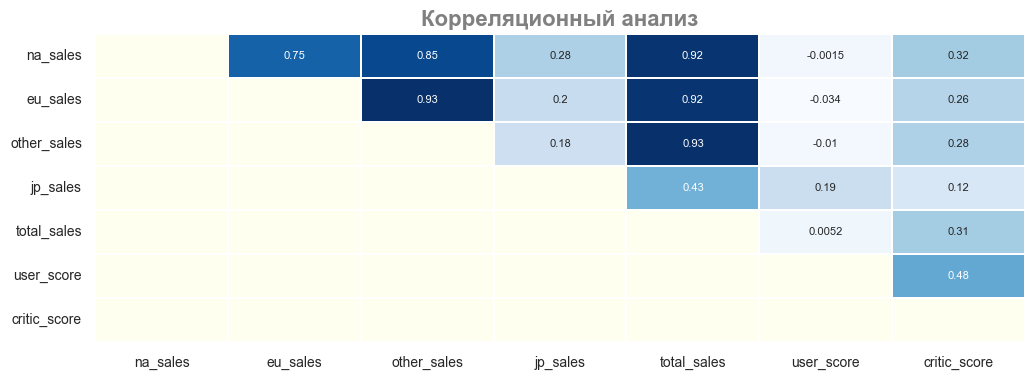

In [1849]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Для построения тепловой карты подготовим срез
actual_data_heat = actual_data[['na_sales', 'eu_sales', 'other_sales', 'jp_sales',
                                'total_sales', 'user_score', 'critic_score']]

# Выбираем верхний треугольник матрицы
triangle = np.tril(actual_data_heat.corr())

# Строим тепловую карту корреляционной матрицы
ax = sns.heatmap(actual_data_heat.corr(), 
                 annot=True, 
                 cmap='Blues',
                 mask=triangle, 
                 annot_kws={'fontsize':8},
                 linewidth =.2,
                 cbar=False)

# Настраиваем параметры
ax.set_title('Корреляционный анализ', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.grid(False) ;

Возьмем для анализа и сравним заисимости между отзывами и продажама для отдельных платформ. 

In [1850]:
actual_data_corr = actual_data[['platform','total_sales', 'user_score', 'critic_score']]
for platform in actual_data['platform'].unique():
    print(f'Зависимость между объемом продаж и оценками критиков и игроков для платформы {platform}.')
    print()
    print(actual_data_corr[actual_data_corr['platform'] == platform].corr(numeric_only=True))
    print()
    print()

Зависимость между объемом продаж и оценками критиков и игроков для платформы PS4.

                      total_sales           user_score         critic_score
total_sales                  1.00                -0.03                 0.39
user_score                  -0.03                 1.00                 0.55
critic_score                 0.39                 0.55                 1.00


Зависимость между объемом продаж и оценками критиков и игроков для платформы 3DS.

                      total_sales           user_score         critic_score
total_sales                  1.00                 0.24                 0.28
user_score                   0.24                 1.00                 0.59
critic_score                 0.28                 0.59                 1.00


Зависимость между объемом продаж и оценками критиков и игроков для платформы XOne.

                      total_sales           user_score         critic_score
total_sales                  1.00                -0.09        

**Вывод:**
1. Зависимости между оценками критиков, оценками игроков и продажами отсутствует, успешность продаж вероятно обеспечивают маркетинговые и рекламные кампании.
2. Обращает на себя внимание низкий уровень корреляция между оценками игроков и оценками критиков.
3. Выделяется высокое влияние продаж в **Северной Америке** на общемировые продажи.
4. В разрезе платформ также не выявленно линейной зависимости между оценками критиков и игроков и продажами. Наибольшую зависимость от оценки критиков наблюдается у игр для **PS4 - 0,39**, а от оценки игроков наибольшую зависимость демоснтрирует **WiiU - 0,38**.

### Продажи по жанрам

Рассмотрим продажи по жанрам за актуальный период, составим круговую диаграмму.

In [1851]:
graph_data = actual_data.groupby('genre').\
    agg(mean_total_sales=('total_sales','mean')).\
        assign(ratio=lambda x: (x / x.sum() * 100)).\
            sort_values(by='ratio', ascending=False).reset_index()

In [1852]:
# Создадим функцию для нанесения подписей данных на бары гистограммы
def add_value_labels(ax, spacing=5, unit='', digit_cap=True):

    # Для каждого столбца устанавливаем подписи данных
    for bar in ax.patches:

        # Получаем координаты подписей данных
        y_value = bar.get_height()
        x_value = bar.get_x() + bar.get_width() / 2

        # Устанавливаем расстояние между баром и подписью данных
        space = spacing

        # Присваиваем подписи данных значение бара, форматируем
        if digit_cap:
            label = f'{round(y_value, 2):,.2f}{unit}'.replace(',', ' ')
        else:
            label = f'{round(y_value, 2):,.0f}{unit}'.replace(',', ' ')

        # Создаем подпись данных
        ax.annotate(label, (x_value, y_value), xytext=(0, space), 
                    textcoords='offset points', ha='center', va='bottom', fontsize=9)

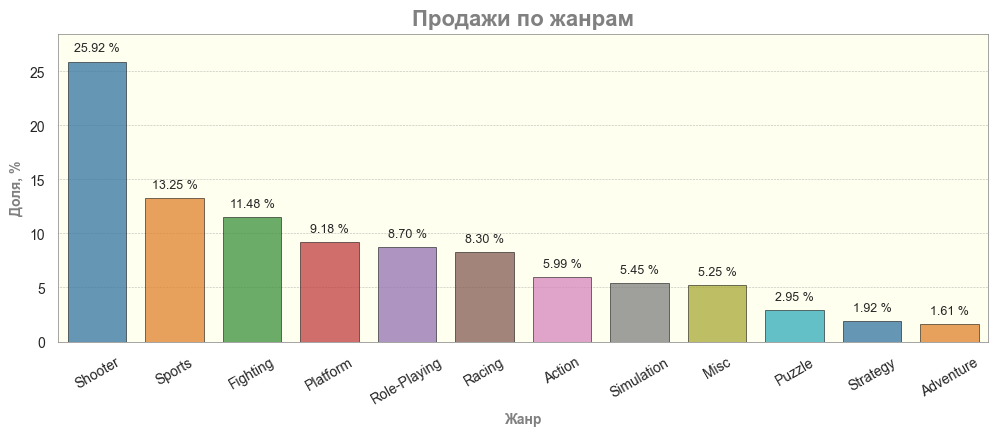

In [1853]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Рисуем график 
ax = sns.barplot(x=graph_data['genre'],
                 y=graph_data['ratio'],
                 palette='tab10',
                 alpha=.75,  
                 linewidth=.5,
                 width=0.75, 
                 edgecolor='black')

# Настраиваем параметры
ax.set_title(f'Продажи по жанрам', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='x', rotation=30)
add_value_labels(ax, unit=' %')
ax.margins(y=0.1)
ax.set_ylabel('Доля, %', fontdict=fd_10)
ax.set_xlabel('Жанр', fontdict=fd_10) ; 

In [1854]:
h_size = 3
v_size = 2

Рассмотрим продажи по жанрам в разрезе платформ.

In [1855]:
# Создаем список с координатами плиток 
tile_coordinates = [[h, v] for h in range(h_size) for v in range(v_size)]

In [1856]:
# Создаем словарь жанр-цвет
genre_color = {actual_data['genre'].unique()[i]:sns.color_palette('tab10', 12)[i] \
               for i in range(0, len(actual_data['genre'].unique()))}

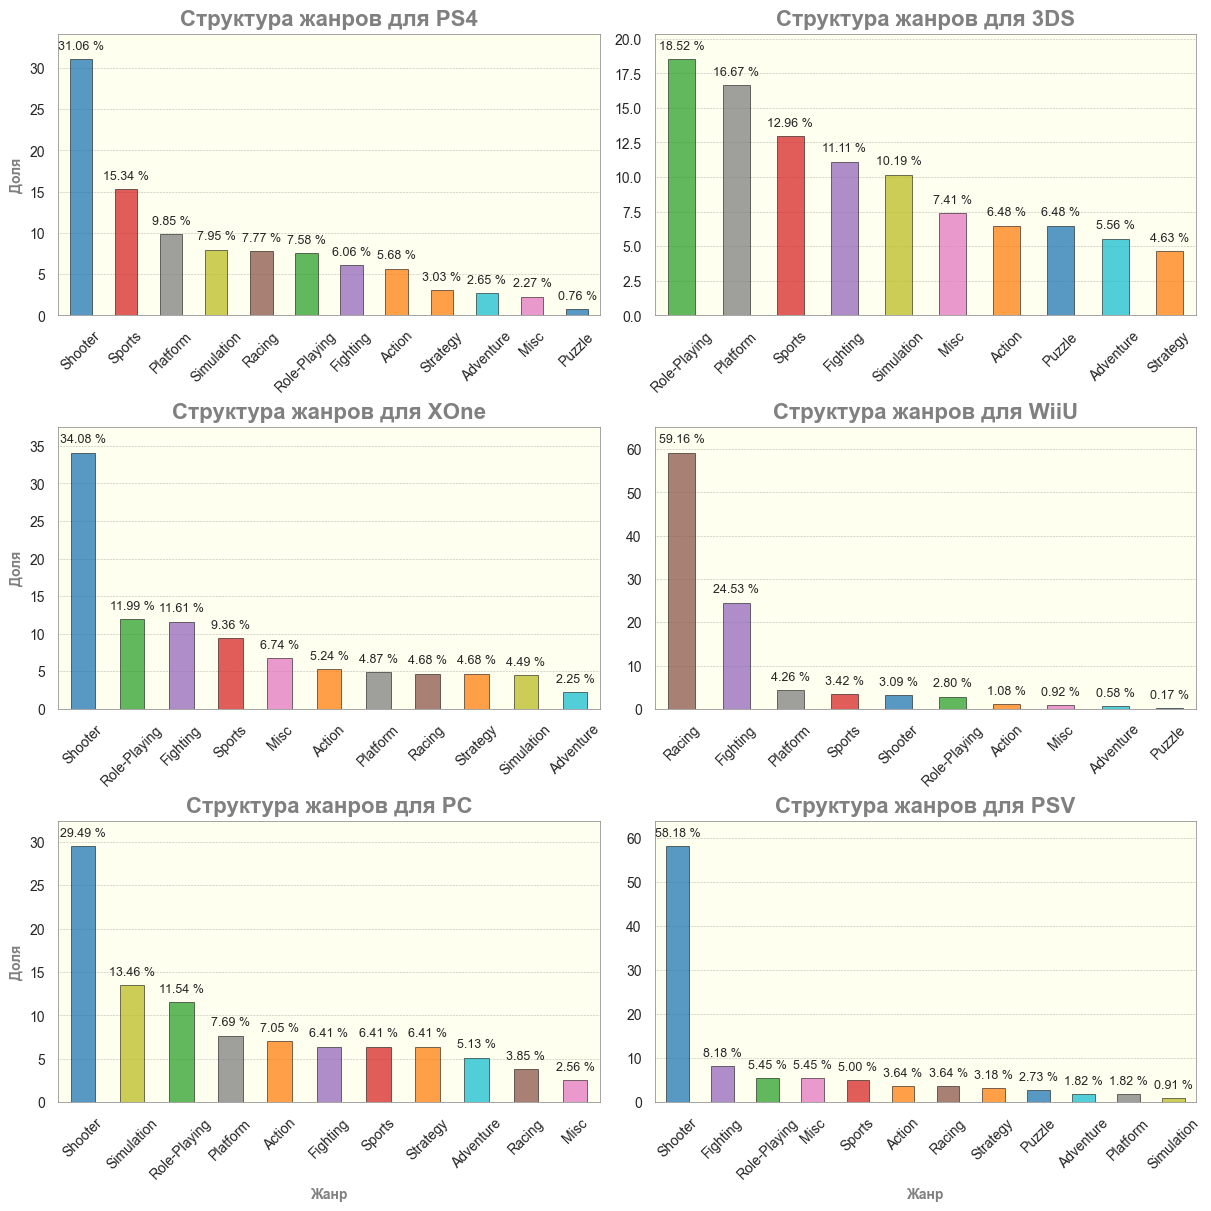

In [1857]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size)
sns.set(rc=graph_set)

# Задаем параметры объекта для построения графиков
fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

platforms = actual_data['platform'].unique()

for i, platform in enumerate(platforms):
    
    # Определяем координаты плиток для каждого металла
    pos_x = tile_coordinates[i][0]
    pos_y = tile_coordinates[i][1]

    graph_data = actual_data[actual_data['platform'] == platform].groupby('genre').\
        agg(mean_total_sales=('total_sales','median')).\
            assign(ratio=lambda x: (x / x.sum() * 100)).\
                sort_values(by='ratio', ascending=False).reset_index()

    # Рисуем график 
    ax = sns.barplot(x=graph_data['genre'],
                     y=graph_data['ratio'],
                     ax=axs[pos_x][pos_y],
                     alpha=.75,  
                     linewidth=.5,
                     width=0.5,
                     edgecolor='black')

    # Настраиваем параметры
    ax.set_title(f'Структура жанров для {platform}', fontdict=fd_16)
    ax.tick_params(axis='both', labelsize=10)
    ax.tick_params(axis='x', rotation=45)
    
    if i % 2 == 0:
        ax.set_ylabel('Доля', fontdict=fd_10)
    else:
        ax.set_ylabel('')

    if i > 3:
        ax.set_xlabel('Жанр', fontdict=fd_10)
    else:
        ax.set_xlabel('')

    add_value_labels(ax, unit=' %')

    # Присваиваем барам соответствующий цвет
    for i, labels in enumerate(ax.get_xticklabels()):
        ax.patches[i].set_facecolor(genre_color[labels.get_text()]) 

    ax.margins(y=0.1) ;

**Выводы:**
1. Для всего рынка продаж наиболее предпочтительными являются жанры **Shooter**, **Sport**, **Fighting**, **Platform**, **Role-Playing**.
2. По разным платформам продажи по жанрам показывают разные результаты:
    * **PS4** наиболее продаваемые жанры: **Shooter**, **Sport**, **Platform**;
    * **3DS** наиболее продаваемые жанры:  **Role-Playing**, **Platform**, **Sport**;
    * **XOne** наиболее продаваемые жанры: **Shooter**, **Role-Playing**, **Fighting**;
    * **WiiU** наиболее продаваемые жанры: **Racing**, **Fighting**, **Platform**;
    * **PC** наиболее продаваемые жанры: **Shooter**, **Simulation**, **Role-Playing**;
    * **PSV** наиболее продаваемые жанры: **Shooter**, **Fighting**, **Role-Playing**;

### Портрет пользователя

Составим портрет пользователя для каждого региона продаж, будем использовать вспомогательный датафрейм `actual_data`.

In [1858]:
h_size = 4
v_size = 2

In [1859]:
# Создаем список с координатами плиток 
tile_coordinates = [[h, v] for h in range(h_size) for v in range(v_size)]

In [1860]:
# Создаем список колонок для построения графиков
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_name = ['Северная Америка', 'Европа', 'Япония', 'Прочие']
columns = [[region_name[i], sales[i], y] for i in range(len(sales)) for y in ['platform', 'genre']]

In [1861]:
# Создаем словарь жанр-цвет
platform_color = {actual_data['platform'].unique()[i]:sns.color_palette('tab10')[i] \
               for i in range(0, len(actual_data['platform'].unique()))}

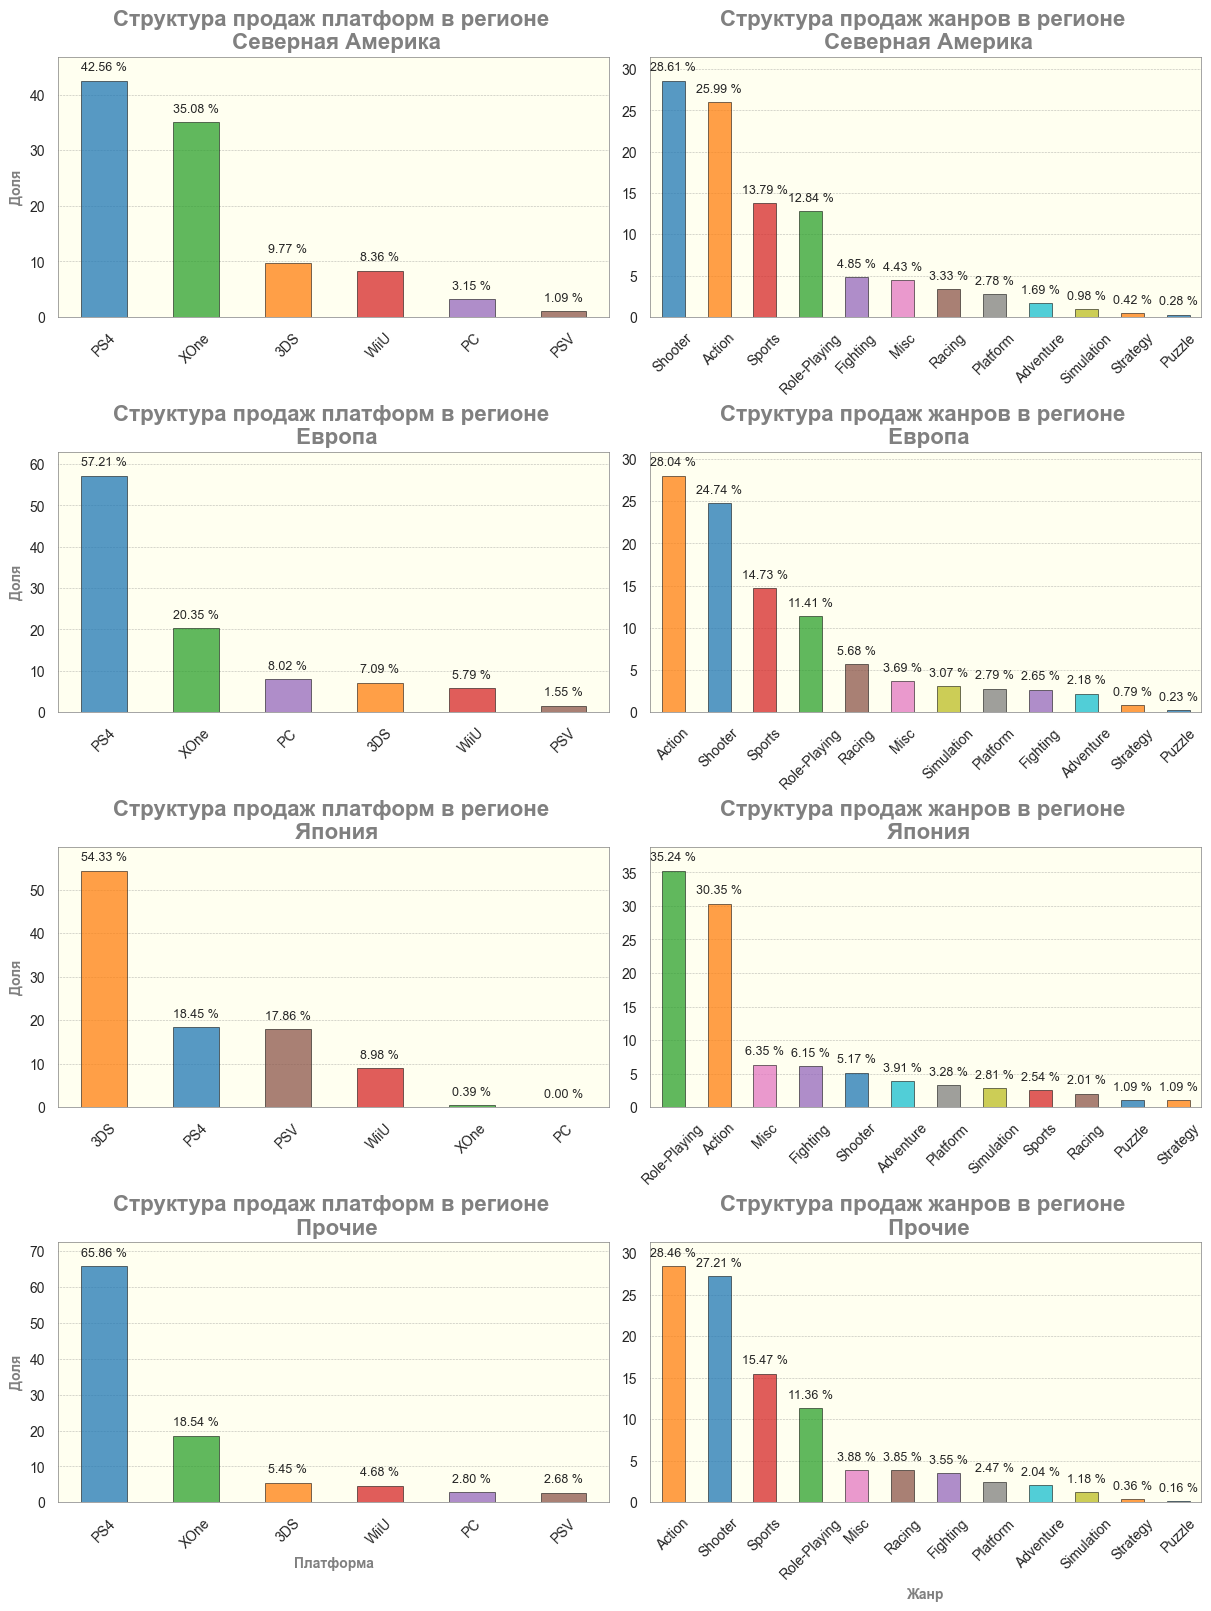

In [1862]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size)
sns.set(rc=graph_set)

fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, col in enumerate(columns):
    
    # Определяем координаты плиток
    pos_x = tile_coordinates[i][0]
    pos_y = tile_coordinates[i][1]

    graph_data = actual_data.groupby(col[2]).\
        agg(region_sales=(col[1], 'sum')).\
            assign(ratio=lambda x: (x / x.sum() * 100)).\
                sort_values(by='ratio', ascending=False).reset_index()

    # Рисуем график 
    ax = sns.barplot(x=graph_data[col[2]],
                     y=graph_data['ratio'],
                     ax=axs[pos_x][pos_y],
                     alpha=.75,  
                     linewidth=.5,
                     width=0.5,
                     edgecolor='black')

    # Настраиваем параметры
    
    ax.tick_params(axis='both', labelsize=10)
    ax.tick_params(axis='x', rotation=45)
    if i % 2 == 0:
        ax.set_title(f'Структура продаж платформ в регионе \n {col[0]}', fontdict=fd_16)
        ax.set_ylabel('Доля', fontdict=fd_10)
        if i == 6:
            ax.set_xlabel('Платформа', fontdict=fd_10)
        else:
            ax.set_xlabel('')

        # Присваиваем барам соответствующий цвет
        for i, labels in enumerate(ax.get_xticklabels()):
            ax.patches[i].set_facecolor(platform_color[labels.get_text()]) 
    else:
        ax.set_title(f'Структура продаж жанров в регионе \n {col[0]}', fontdict=fd_16)
        ax.set_ylabel('')
        if i == 7:
            ax.set_xlabel('Жанр', fontdict=fd_10)
        else:
            ax.set_xlabel('')

        # Присваиваем барам соответствующий цвет
        for i, labels in enumerate(ax.get_xticklabels()):
            ax.patches[i].set_facecolor(genre_color[labels.get_text()])

    
    

    add_value_labels(ax, unit=' %')

    ax.margins(y=0.1); 

* В **Северной Америке** предпочитают играть в  **Shooter - 29%**, **Action - 26%** и **Sport - 14%** на платформах **PS4 - 43%**, **XOne - 35%**, **3DS 10%**.
* В **Европе** предпочитают жанры **Action - 28%**, **Shooter - 25%**, **Sport - 15%** на платформах **PS4 - 57%**, **XOne - 15%**, **PC - 8%**.
* В **Японии** играют в **Role-Playing - 35%**, и **Action - 30%**, на платформе **3DS - 54%**, **PS4 - 18%**, **PSV - 18%**, **WiiU - 9%**, **XOne** в регионе вообще не представлен.
* Прочие регионы играют в **Action - 28%**, **Shooter - 27%**, **Sport - 15%**, **Role-Playing - 11%** на платформах **PS4 - 66%**, **XOne - 19%**, **3DS - 5%**, **WiiU - 5%**.

**Выводы:**
1. Во всех исследуемых регионах за исключением **Японии** среди платформ явное преимущество **PS4**. Японцы предпочитают **3DS**.
2. Наиболее востребованым жанром является шутер и экшен за исключением **Японии**, там игроки больше предпочитают РПГ и экшен.
3. В Японии нет рынка игр для **XOne** и **PC**, можно отметить что японский рынок кардинально отличается от прочих представленных и по распределению платформ и по жанрам.

### Рейтинг продаж для платформ, жанров и регионов

Составим рейтинги для платформ и жанров

In [1863]:
# Составляем рейтинг для платформ
top_platform = actual_data.groupby('platform', as_index=True).agg(sum=('total_sales','sum')).\
        sort_values(by='sum', ascending=False).head(5).reset_index()

# Добавим столбец с процентом от общей суммы продаж
top_platform = top_platform.\
        assign(ratio=lambda x: (top_platform['sum'] / top_platform['sum'].sum() * 100))

# Начнем индекс с 1
top_platform.index = np.arange(1, len(top_platform) + 1)

In [1864]:
top_platform

,platform,sum,ratio
1,PS4,288.15,49.21
2,XOne,140.36,23.97
3,3DS,86.68,14.80
4,WiiU,42.98,7.34
5,PC,27.40,4.68


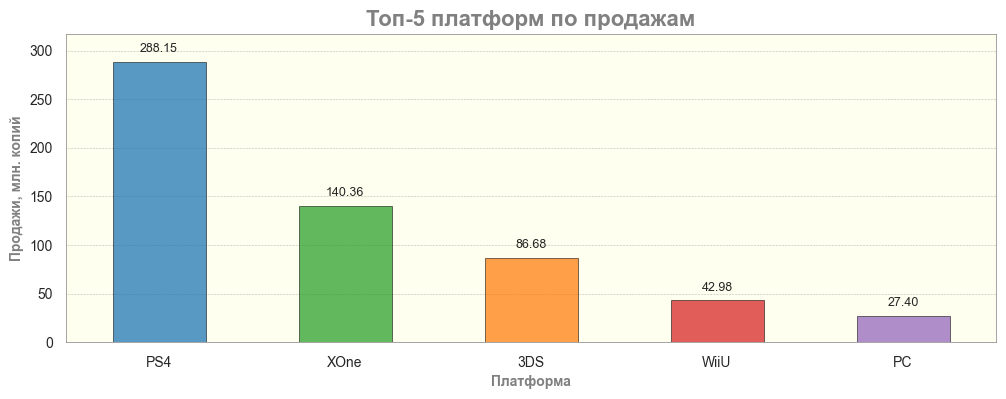

In [1865]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height)
sns.set(rc=graph_set)

# Рисуем график 
ax = sns.barplot(x=top_platform['platform'],
                    y=top_platform['sum'],
                    alpha=.75,  
                    linewidth=.5,
                    width=0.5,
                    edgecolor='black')

# Настраиваем параметры
ax.set_title(f'Топ-5 платформ по продажам', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Продажи, млн. копий', fontdict=fd_10)

add_value_labels(ax)

# Присваиваем барам соответствующий цвет
for i, labels in enumerate(ax.get_xticklabels()):
    ax.patches[i].set_facecolor(platform_color[labels.get_text()]) 

ax.margins(y=0.1)
ax.set_xlabel('Платформа', fontdict=fd_10) ; 

In [1866]:
# Составляем рейтинг для платформ
top_genre = actual_data.groupby('genre', as_index=True).agg(sum=('total_sales','sum')).\
        sort_values(by='sum', ascending=False).head(5).reset_index()

# Добавим столбец с процентом от общей суммы продаж
top_genre = top_genre.\
        assign(ratio=lambda x: (top_genre['sum'] / top_genre['sum'].sum() * 100))

# Начнем индекс с 1
top_genre.index = np.arange(1, len(top_genre) + 1)

In [1867]:
top_genre

,genre,sum,ratio
1,Action,167.89,32.96
2,Shooter,145.11,28.48
3,Role-Playing,92.05,18.07
4,Sports,77.96,15.30
5,Misc,26.43,5.19


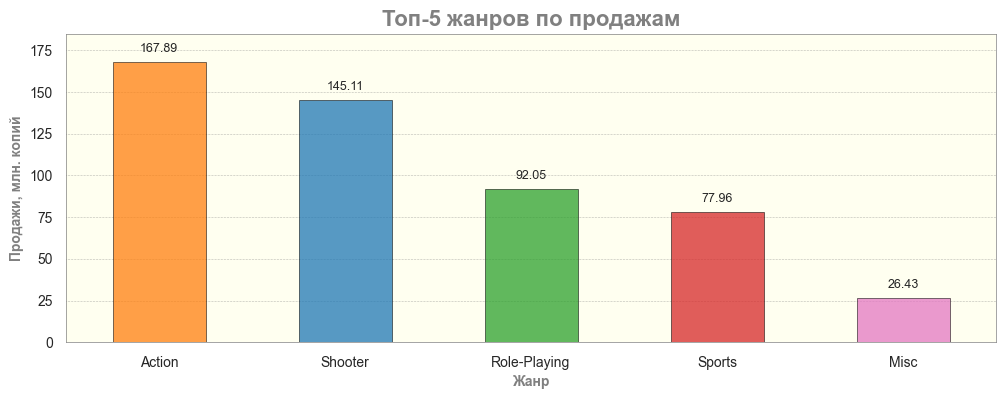

In [1868]:
# Рисуем график 
ax = sns.barplot(x=top_genre['genre'],
                    y=top_genre['sum'],
                    alpha=.75,  
                    linewidth=.5,
                    width=0.5,
                    edgecolor='black')

# Настраиваем параметры
ax.set_title(f'Топ-5 жанров по продажам', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Продажи, млн. копий', fontdict=fd_10)

add_value_labels(ax)

# Присваиваем барам соответствующий цвет
for i, labels in enumerate(ax.get_xticklabels()):
    ax.patches[i].set_facecolor(genre_color[labels.get_text()]) 

ax.margins(y=0.1)
ax.set_xlabel('Жанр', fontdict=fd_10) ; 

In [1869]:
# Создадим список с данными продаж по регионам
region_sales = [[region_name[i], actual_data[sales[i]].sum()] for i in range(len(region_name))]

# Переводим в формат датафрейма
region_sales = pd.DataFrame(region_sales, columns=['region', 'sum'], index=np.arange(1, 5))

# Добавляем столбец с процентами от общей суммы продаж
region_sales = region_sales.\
    assign(ratio=lambda x: (region_sales['sum'] / region_sales['sum'].sum() * 100))

In [1870]:
region_sales

,region,sum,ratio
1,Северная Америка,231.69,38.11
2,Европа,227.31,37.39
3,Япония,81.43,13.39
4,Прочие,67.54,11.11


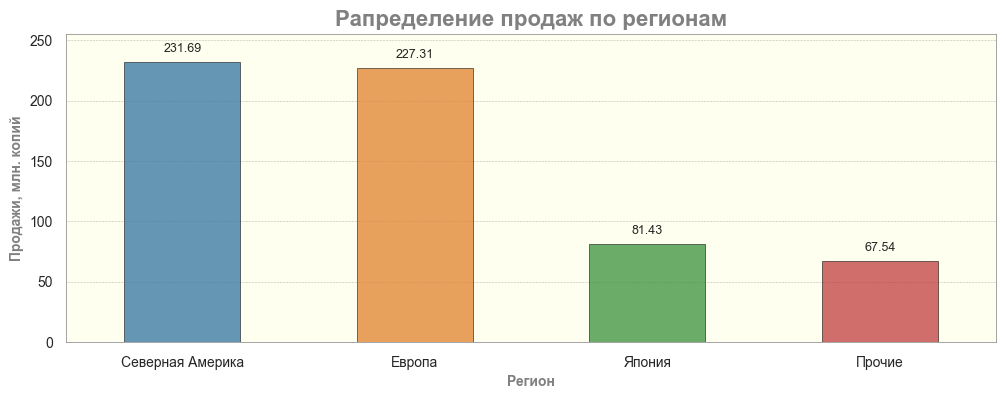

In [1871]:
# Рисуем график 
ax = sns.barplot(x=region_sales['region'],
                 y=region_sales['sum'],
                 palette='tab10',
                 alpha=.75,  
                 linewidth=.5,
                 width=0.5,
                 edgecolor='black')

# Настраиваем параметры
ax.set_title(f'Рапределение продаж по регионам', fontdict=fd_16)
ax.tick_params(axis='both', labelsize=10)
ax.set_ylabel('Продажи, млн. копий', fontdict=fd_10)

add_value_labels(ax)

ax.margins(y=0.1)
ax.set_xlabel('Регион', fontdict=fd_10) ; 

**Выводы:**
1. Топ-5 по платформам возглавляет **PS4**.
2. Топ-5 по жанрам возглавляют игры жанра **Action**.
3. Самые крупные рынки для компьютерных игр в **Северной Америке** и в **Европе**.

### Влияние рейтинга **ESRB** на продажи

Построим диаграммы для каждого региона.

In [1872]:
h_size = 2
v_size = 2

In [1873]:
# Создаем список с координатами плиток 
tile_coordinates = [[h, v] for h in range(h_size) for v in range(v_size)]

In [1874]:
regions = [[sales[i], region_name[i]] for i in range(len(region_name))]

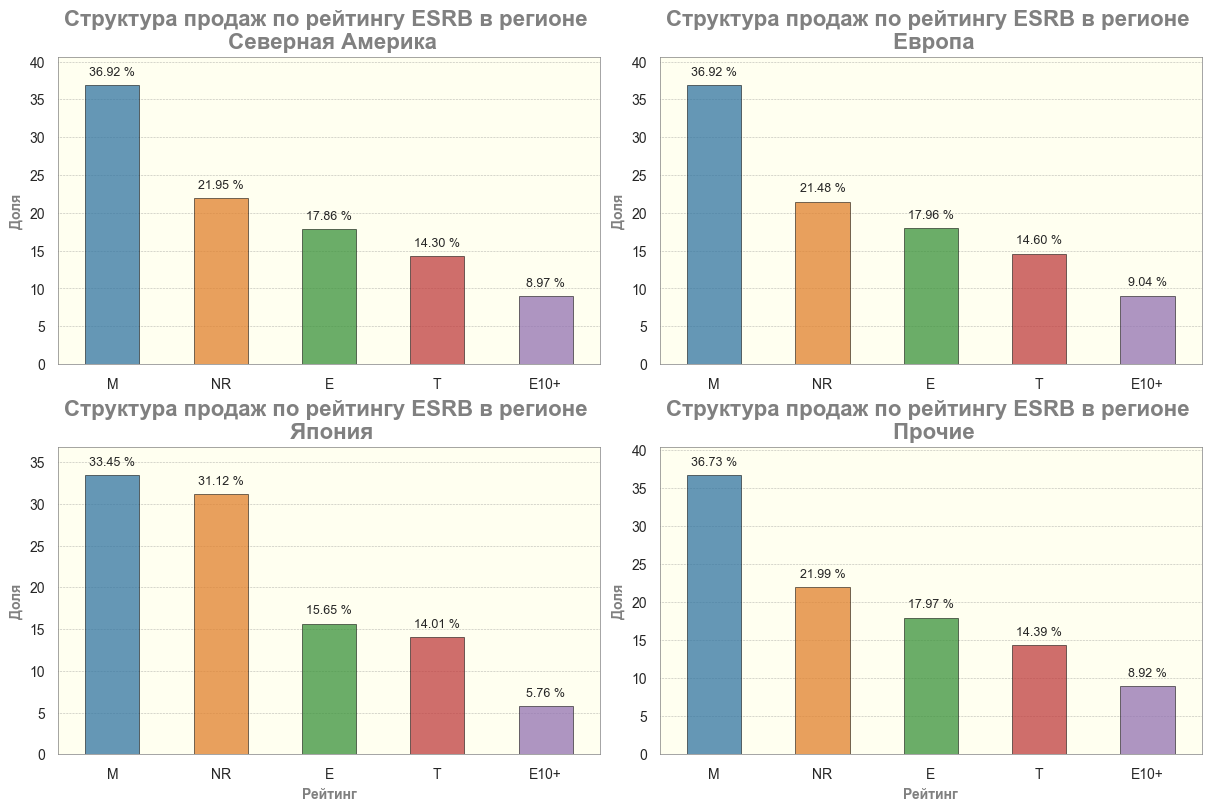

In [1875]:
# Задаем параметры объекта для построения графиков
graph_set['figure.figsize'] = (width, height * h_size)
sns.set(rc=graph_set)

fig, axs = plt.subplots(h_size, v_size, constrained_layout=True)

for i, region in enumerate(regions):
    
    # Определяем координаты плиток
    pos_x = tile_coordinates[i][0]
    pos_y = tile_coordinates[i][1]
    
    # Формируем данные для графика
    graph_data = actual_data[actual_data[region[0]] > 0].\
        groupby('rating').agg(sum = ('total_sales', 'sum'))
    
    graph_data = graph_data.assign(ratio=lambda x: graph_data['sum'] / graph_data['sum'].sum() * 100)
    graph_data = graph_data.sort_values(by='ratio', ascending=False).reset_index()

    # Рисуем график 
    ax = sns.barplot(x=graph_data['rating'],
                     y=graph_data['ratio'],
                     ax=axs[pos_x][pos_y],
                     palette='tab10',
                     alpha=.75,  
                     linewidth=.5,
                     width=0.5,
                     edgecolor='black')

    # Настраиваем параметры
    ax.tick_params(axis='both', labelsize=10)

    ax.set_title(f'Структура продаж по рейтингу ESRB в регионе \n {region[1]}', fontdict=fd_16)
    
    ax.set_ylabel('Доля', fontdict=fd_10)

    if i > 1:
        ax.set_xlabel('Рейтинг', fontdict=fd_10)
    else:
        ax.set_xlabel('', fontdict=fd_10)

    add_value_labels(ax, unit=' %')

    ax.margins(y=0.1); 

Справочно:
* **М** - контент для детей от 17 лет и старше
* **T** - контент для детей от 13 лет и старше
* **Е10+** - контент для детей от 10 лет и старше
* **E** - контент для всех возрастов
* **RP** - рейтинг для контента еще не присвоен

**Выводы:**
1. Наибольшие продажи по всем регионам наблюдаются для игр с рейтингом **М**, причины такого распределения в предпочтениях игроков, как мы выяснили ранее, наиболее востребованные жанры это шутеры, где без сцен насилия, убийств не обойтись. 
2. На 2-м месте продажи игр без рейтинга. Как уже отмечалось выше мы заменили отсутствующие данные маркером **NR**. Нам достоверно не известна причина отсутствия данных, возможно рейтинг есть, но он не попал в выгрузку или изначально отсутствовал в базе данных.
3. На японском рынке высокая доля продаж игр без рейтинга, объяснить то можно тем, что много игр выпускается только для рынка **Японии**, соответственно нет необходимости получать американский ESRB рейтинг.

## Проверка гипотез

Согласно техническому заданию заказчика требуется проверить две гипотезы:

1. Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые.
2. Средние пользовательские рейтинги жанров **Action** и **Sports** разные.

### Проверка гипотезы №1. "Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые".

Для проверки гипотезы "средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые" сформулируем их следующим образом
* **H0**: средние рейтинги по платформам одинаковые;
* **H1**: средние рейтинги по платформам разные;
Для проверки гипотез будем рассматривать вспогательный датафрейм `actual_data` как генеральную совокупность. т.е. будут сравниваться средние двух генеральных совокупностей оценок по платформе **PC** и **XOne** разного размера.

In [1876]:
# создадим вспомогатлеьные дататфреймы для каждой платформы отбросим строки где нет отзывов
actual_data_pc = actual_data[(actual_data['platform'] == 'PC') & (~actual_data['user_score'].isna())]
actual_data_xone = actual_data[(actual_data['platform'] == 'XOne') & (~actual_data['user_score'].isna())]

# Определим параметр уровень статистической значимости
alpha = .05

# Рассчитаем значение p-value
result = st.ttest_ind(actual_data_xone['user_score'], actual_data_pc['user_score'])

In [1877]:
# Если pvalue ниже уровня статистической значимости не отвергаем нулевую гипотезу
print('p-значение:', round(result.pvalue, 2))

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.04
Отвергаем нулевую гипотезу


**Вывод:**
1. На основании проведенного теста, нет оснований утверждать, что пользовательские оценки для платформ **PC**, **XOne** равны.

### Проверка Гипотезы №2. "Средние пользовательские рейтинги жанров **Action** и **Sports** разные".

Для проверки гипотезы "Средние пользовательские рейтинги жанров **Action** и **Sports** разные" сформулируем их следующим образом
* **H0**: средние рейтинги по жанрам одинаковые;
* **H1**: средние рейтинги по жанрам разные;

Для проверки гипотез будем рассматривать вспогательный датафрейм `actual_data` как генеральную совокупность. т.е. будут сравниваться средние двух генеральных совокупностей оценок по платформе **PC** и **XOne** разного размера.

In [1878]:
# создадим вспомогатлеьные дататфреймы для каждого жанра отбросим строки где нет отзывов
actual_data_action = actual_data[(actual_data['genre'] == 'Action') & (~actual_data['user_score'].isna())]
actual_data_sports = actual_data[(actual_data['genre'] == 'Sports') & (~actual_data['user_score'].isna())]

# Определим параметр уровень статистической значимости
alpha = .05

# Рассчитаем значение p-value
result = st.ttest_ind(actual_data_action['user_score'], actual_data_sports['user_score'])

In [1879]:
# Если pvalue ниже уровня статистической значимости не отвергаем нулевую гипотезу
print('p-значение:', round(result.pvalue, 2))

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


**Выводы:**
1. На основании проведенного теста, можно утверждать, что гипотеза о том, что пользовательские оценки для жанров **Action** и **Sport** равны. статистически не значима.

## Выводы

1. В рамках проекта по исследованию критериев успешности компьютерных игр выполнена предварительная обработка данных и анализ представленного датасета.
2. В настоящий момент после активного роста количества выпущенных игр в период **2000-2010 гг**. рынок стабилизировался на уровне примерно **300** выпущеных игр в год со слабой тенденцией к снижениию.
3. Лидерами по продажам игр являются регионы **Северная Америка** и **Европа**, суммарно **75%** рынка.
4. За период **2011-2016 гг**. все основные платформы **PS4**, **3DS**, **XOne**, **WiiU**, показали снижение продаж.
5. Наиболее предпочтительной платформой для регионов **Северная Америка**, **Европа** и **Прочие** является **PS4**, доли рынка **43-66%**, на втором месте **XOne** c долями **19-35%**, в **Японии** лидер **3DS** с долей рынка **54%**. Для японского рынка харрактерно использование портативных консолей, общая доля таких устройств составляет **72%**. Рекомендуется формировать ассортиментную матрицу региональных магазинов исходя из указанных долей рынка, для платформы **3DS** объем закупаемых игр снизить, приставка находится на пике жизненного цикла и в ближайшие **2-3** года может появиться консоль нового поколения. 
6. Наиболее предпочтительными жанрами для игроков **Северной Америки**, **Европы** и **Прочих** регионов являются **Action**, **Shooter**, **Sport** доли находятся в диапазоне **25-29%** по регионам. На японском рынке предпочтения отдают **Role Playing 35%** и **Action 30%**. Рекомендеется формировать ассортиментую матрицу региональных магазинов исходя из указанных предпочтений пользователей.
7. В результат анализа определено, что отсутствует линейная зависимость между объемами продаж игр и оценками пользователей или критиков, ни в целом, ни по отдельным платформам. Рекомендуется при формировании ассортимента магазинов учитывать этот фактор. 
8. Проверено влияние рейтинга **ESRB** на продажи игр, выявленно, что больше всего продается игр с рейтингом **М**, вторую строчку занимают продажи игр без рейтинга, однако достоверно неизвестно, действительно ли отсутствует рейтинг или о нем нет информации. Выделяется японский рынок, на нем на доля игр без рейтинга выше примерно на **50%** относительно других регионов, возможно по той причине, что много игр выпускается адресно для японского рынка и они не требуют наличия рейтинга **ESRB**, далее идут игры с рейтингом **E**, **T**, **E10+**. Большое количество продаж игр с рейтингом **М** коррелирует с жанровыми предпочтениями игроков. 
9. Проверены две гипотезы: "О равенстве средних оценок для платформ **PC** и **XOne**" и "О равенстве средних оценок для жанров **Action** и **Sport**", в результате проверки определено, что обе гипотезы статистически не значимы.